# Week-4 Cybersecurity Architecture

In this notebook, we explore the development of various cybersecurity architectures and threat models critical for securing modern web platforms. These architectures include MVC, Defense in Depth, Zero Trust, TOGAF, SABSA, and SSDLC, implemented across AWS and Azure. Each section includes diagrams, tables, and detailed analyses to visualize and explain concepts, enriched with educational content and references to industry standards.

**Learning Objectives:**
- Understand key cybersecurity architecture frameworks and their principles.
- Learn how to implement these architectures using cloud services.
- Analyze their applicability, usage, challenges, and historical incidents.

##  Frameworks vs. Architecture


| **Aspect**       | **Framework**                                                                                          | **Architecture**                                                                                     |
|-------------------|--------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Definition**   | A structured collection of guidelines, standards, and best practices for managing cybersecurity risks. | A systematic design and approach for implementing security solutions within technology systems.      |
| **Focus**        | Defines "what" should be protected and managed.                                                        | Describes "how" to structure and deploy security measures.                                           |
| **Examples**     | - NIST Cybersecurity Framework (CSF)<br>- ISO/IEC 27001<br>- CIS Controls<br>- Cloud Controls Matrix (CCM)<br>- MITRE ATT&CK | - Zero Trust Architecture (ZTA)<br>- Defense in Depth (DiD)<br>- TOGAF Security Architecture<br>- SABSA<br>- Security by Design (SSDLC, DevSecOps) |


## Install Requirements

Before running the code, ensure the `diagrams` library is installed to generate architecture diagrams, and `tabulate` for formatted tables. These libraries aid in visualizing complex systems and presenting data clearly for educational purposes.

In [1]:
# Install required libraries using pip
!pip install diagrams tabulate

## 1. Build a Web Platform using MVC (Model-View-Controller) Architecture

The **Model-View-Controller (MVC)** architecture is a foundational design pattern in software engineering, particularly for web applications.

### Core Principles
- **Separation of Concerns**: Divides application into Model (data/logic), View (interface), and Controller (input processing).
- **Modularity**: Enables independent development and maintenance.
- **Reusability**: Components can be reused across projects.

### When to Use
- Ideal for scalable web applications needing clear separation.
- Suitable for maintainable projects with frequent updates.

### When Not to Use
- Avoid for simple apps where separation adds unnecessary complexity.
- Not recommended if the team lacks MVC expertise.

### Appropriate Platforms
- Web frameworks like Flask, Django, Ruby on Rails.

### Usage
- **How Widely Used**: Extensively in e-commerce, finance, healthcare.
- **What It’s Used For**: Building scalable, testable web applications.

### Issues
- **Complexity**: Overkill for small apps.
- **Learning Curve**: Requires pattern familiarity.

### Well-Known Problems
- **Tight Coupling**: Poor implementation creates dependencies.
- **Performance**: Large datasets can slow unoptimized systems.

### Known Cybersecurity Incidents
- **SQL Injection**: Model input flaws (e.g., early web apps).
- **XSS**: View escaping issues (e.g., e-commerce sites).

**Reference**: Gamma, E., et al. (1994). *Design Patterns*. Addison-Wesley.

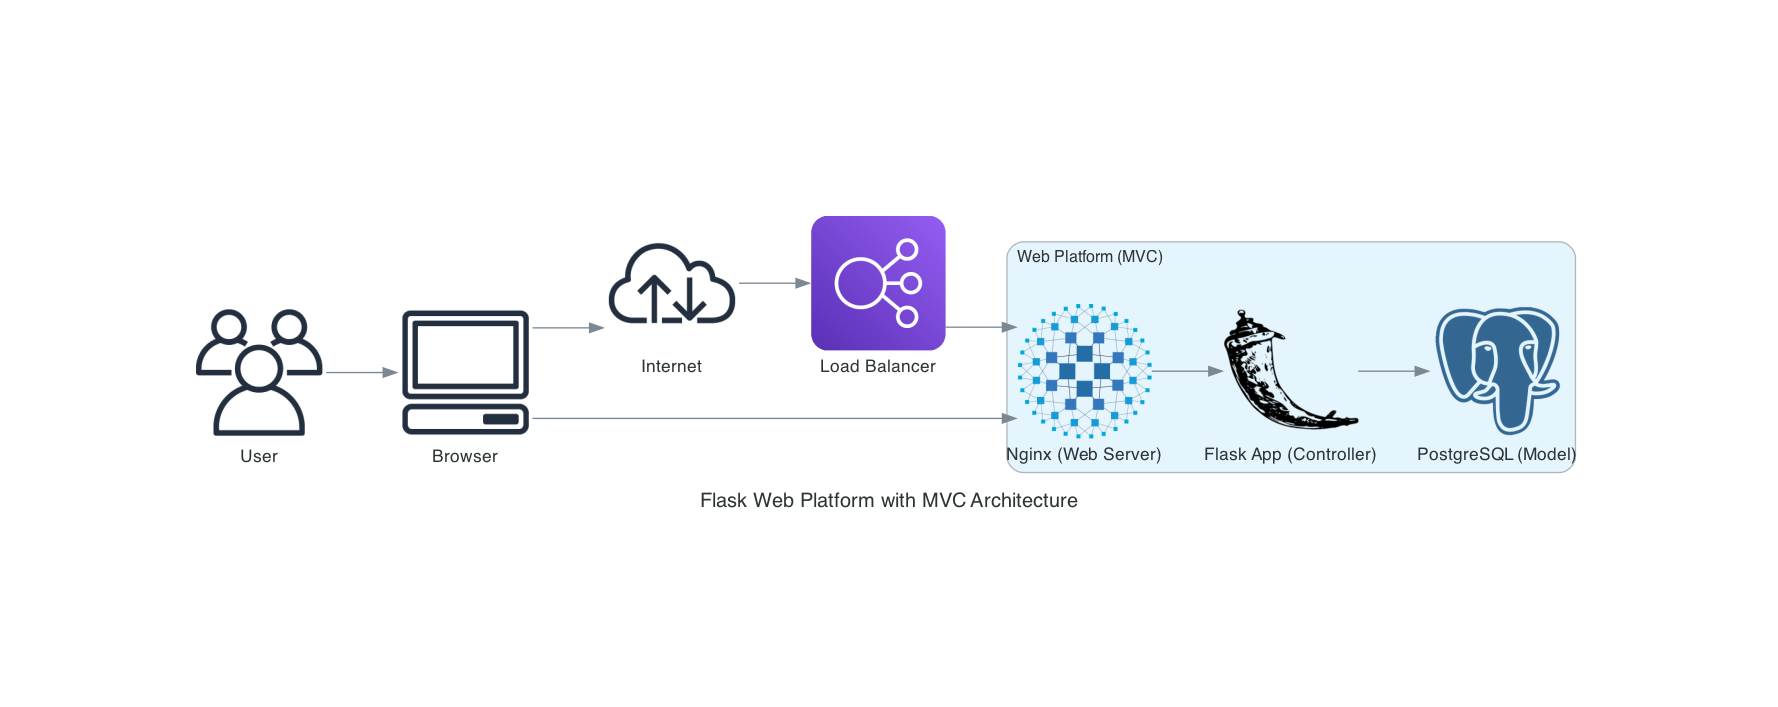

In [2]:
from diagrams import Diagram, Cluster
from diagrams.onprem.client import Users, Client
from diagrams.onprem.network import Internet, Haproxy
from diagrams.programming.framework import Flask
from diagrams.onprem.database import PostgreSQL
from diagrams.aws.network import ELB
from IPython.display import Image

with Diagram("Flask Web Platform with MVC Architecture", show=False, outformat="png", filename="flask_mvc_arch"):

    user = Users("User")
    browser = Client("Browser")
    internet = Internet("Internet")
    lb = ELB("Load Balancer")

    with Cluster("Web Platform (MVC)"):
        view = browser
        nginx = Haproxy("Nginx (Web Server)")
        controller = Flask("Flask App (Controller)")
        model = PostgreSQL("PostgreSQL (Model)")

        view >> nginx >> controller >> model

    user >> view
    view >> internet >> lb >> nginx

Image(filename="flask_mvc_arch.png")


### Building Web Platform on AWS

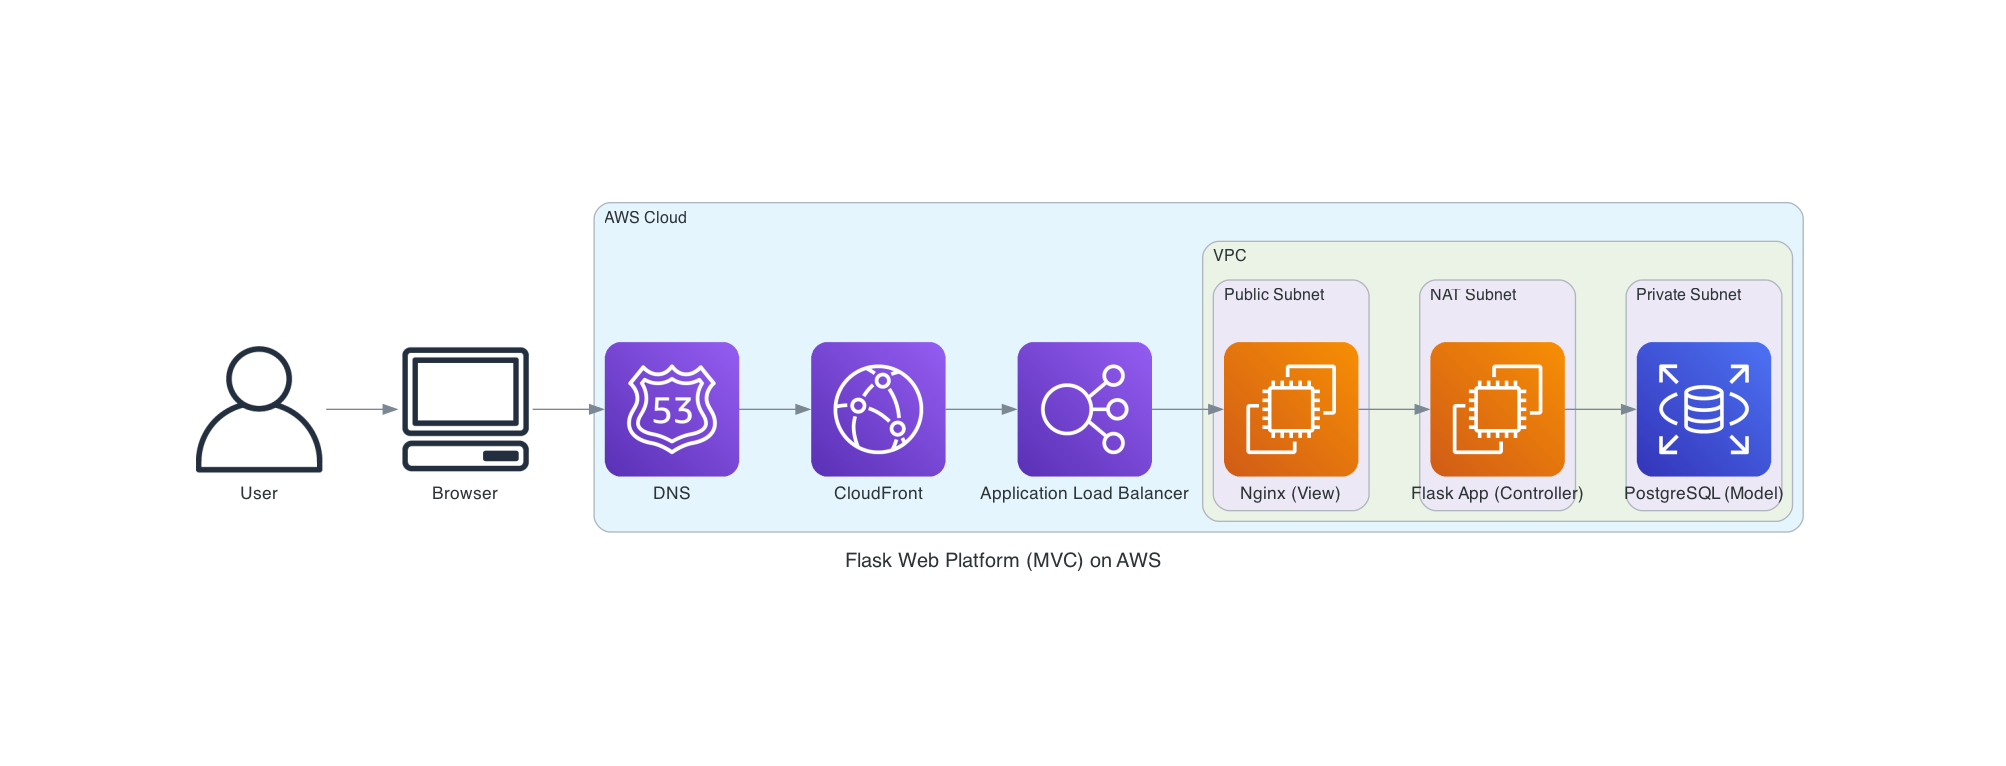

In [3]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB, CloudFront, VPC, InternetGateway, Route53
from diagrams.aws.compute import EC2, Lambda
from diagrams.aws.database import RDS
from diagrams.aws.general import User
from diagrams.aws.security import WAF
from diagrams.aws.management import Cloudwatch
from diagrams.onprem.client import Client

from IPython.display import Image

with Diagram("Flask Web Platform (MVC) on AWS", show=False, outformat="png", filename="flask_mvc_aws_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        dns = Route53("DNS")
        cdn = CloudFront("CloudFront")
        lb = ELB("Application Load Balancer")

        with Cluster("VPC"):
            with Cluster("Public Subnet"):
                nginx = EC2("Nginx (View)")

            with Cluster("NAT Subnet"):
                ec2 = EC2("Flask App (Controller)")

            with Cluster("Private Subnet"):
                db = RDS("PostgreSQL (Model)")

            nginx >> ec2 >> db

        dns >> cdn >> lb >> nginx

    user >> browser >> dns

Image(filename="flask_mvc_aws_arch.png")

### Building Web Platform on Azure

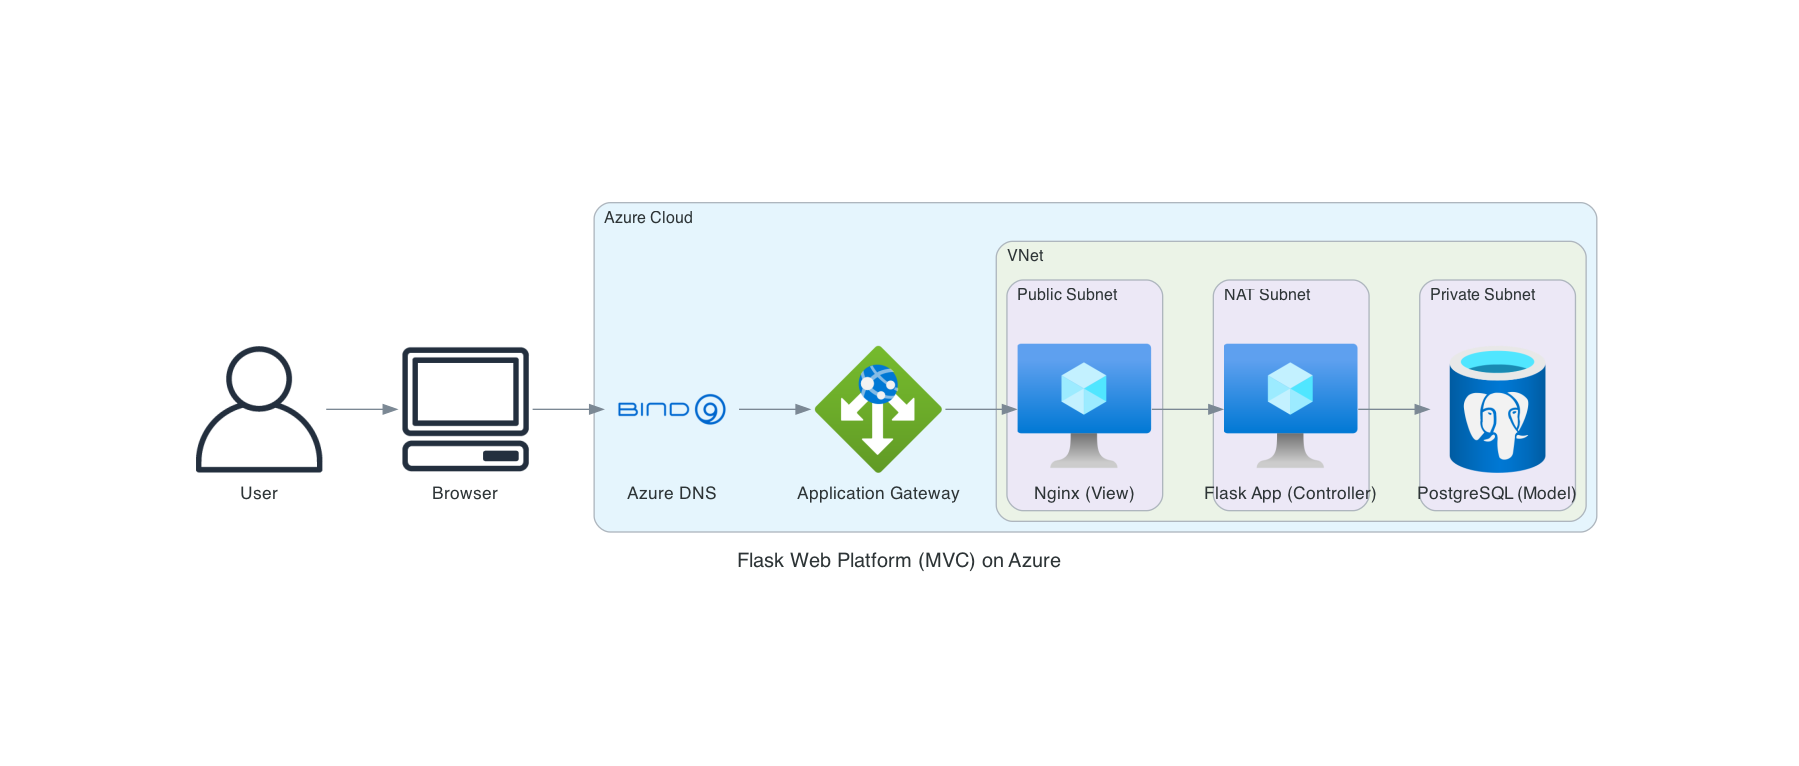

In [4]:
from diagrams import Diagram, Cluster
from diagrams.azure.network import ApplicationGateway, VirtualNetworks
from diagrams.azure.compute import VM 
from diagrams.azure.database import DatabaseForPostgresqlServers
from diagrams.azure.general import Usericon
from diagrams.onprem.client import Client
from diagrams.onprem.network import Bind9 

from IPython.display import Image

with Diagram("Flask Web Platform (MVC) on Azure", show=False, outformat="png", filename="flask_mvc_azure_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("Azure Cloud"):
        dns = Bind9("Azure DNS")  # Using generic DNS as fallback
        lb = ApplicationGateway("Application Gateway")

        with Cluster("VNet"):
            with Cluster("Public Subnet"):
                nginx = VM("Nginx (View)")  # Updated to VM

            with Cluster("NAT Subnet"):
                app = VM("Flask App (Controller)")  # Updated to VM

            with Cluster("Private Subnet"):
                db = DatabaseForPostgresqlServers("PostgreSQL (Model)")

            nginx >> app >> db

        dns >> lb >> nginx

    user >> browser >> dns

Image(filename="flask_mvc_azure_arch.png")

## Defense in Depth

**Defense in Depth** uses multiple security layers to protect assets.

### Core Principles
- **Layered Security**: Multiple controls at different levels.
- **Redundancy**: Overlapping measures for resilience.
- **Diversity**: Varied controls for multiple threats.

### When to Use
- High-value assets (e.g., financial data).
- Environments with diverse threats (e.g., cloud).

### When Not to Use
- Low-risk settings where cost exceeds benefits.
- Limited resource scenarios.

### Appropriate Platforms
- Enterprise networks, cloud systems, critical infrastructure.

### Usage
- **How Widely Used**: Common in finance, healthcare, government.
- **What It’s Used For**: Protecting against malware, phishing.

### Issues
- **Complexity**: Hard to manage multiple layers.
- **Cost**: High implementation expense.

### Well-Known Problems
- **Misconfiguration**: Creates vulnerabilities.
- **Over-Reliance**: Neglects weaker layers.

### Known Cybersecurity Incidents
- **Target Breach (2013)**: HVAC exploit, 40M cards stolen.
- **Equifax (2017)**: Web flaw, 147M affected.

**Reference**: NIST. (2018). *Cybersecurity Framework*. https://www.nist.gov/cyberframework

In [5]:
from tabulate import tabulate

# Updated Defense in Depth data with Azure services
data = [
    ["User Access", "IAM policies, MFA", "Azure AD policies, MFA", "Verify user identity, enforce least privilege access"],
    ["Client Device", "Browser security, TLS", "Browser security, TLS", "Prevent client-side exploits and ensure secure transport"],
    ["Edge Protection", "WAF, CloudFront, Route53, ACM", "Azure Front Door, Azure CDN, Azure DNS, Azure Key Vault", "Protect against DDoS, injection attacks, and ensure TLS"],
    ["Network Perimeter", "Security Groups, NACLs, ELB, VPC", "NSGs, Azure Firewall, Azure Load Balancer, VNet", "Define trusted boundaries and control ingress/egress"],
    ["Public Subnet", "Inspector, EC2 hardening", "Azure Security Center, VM hardening", "Scan for vulnerabilities and minimize attack surface"],
    ["App Layer (NAT Subnet)", "Private EC2, Secrets Manager, KMS", "Private VMs, Azure Key Vault", "Secure app logic, encrypt data, manage secrets"],
    ["Data Layer (Private Subnet)", "RDS, S3 Backup, KMS", "Azure SQL Database, Blob Storage Backup, Azure Key Vault", "Encrypt and store sensitive data privately and durably"],
    ["Monitoring & Logging", "CloudWatch, CloudTrail", "Azure Monitor, Azure Activity Log", "Observe, alert, and audit operational behavior"],
    ["Compliance Monitoring", "AWS Config", "Azure Policy, Azure Security Center", "Track and enforce compliance with best practices"],
    ["Secrets Management", "AWS Secrets Manager", "Azure Key Vault", "Store credentials securely and rotate them automatically"],
    ["Threat Detection", "GuardDuty, Inspector, Macie", "Azure Security Center, Azure Defender, Azure Sentinel", "Detect malware, sensitive data exposure, API anomalies"],
]

# Updated headers for display
headers = ["Layer", "AWS Controls", "Azure Controls", "Reason & Functionality"]

# Print as a nice table
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════════════╤═══════════════════════════════════╤══════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════╕
│ Layer                       │ AWS Controls                      │ Azure Controls                                           │ Reason & Functionality                                   │
╞═════════════════════════════╪═══════════════════════════════════╪══════════════════════════════════════════════════════════╪══════════════════════════════════════════════════════════╡
│ User Access                 │ IAM policies, MFA                 │ Azure AD policies, MFA                                   │ Verify user identity, enforce least privilege access     │
├─────────────────────────────┼───────────────────────────────────┼──────────────────────────────────────────────────────────┼──────────────────────────────────────────────────────────┤
│ Client Device               │ Browser security, TLS             │ Br

### Web Infrastructure using Defense in Depth on AWS

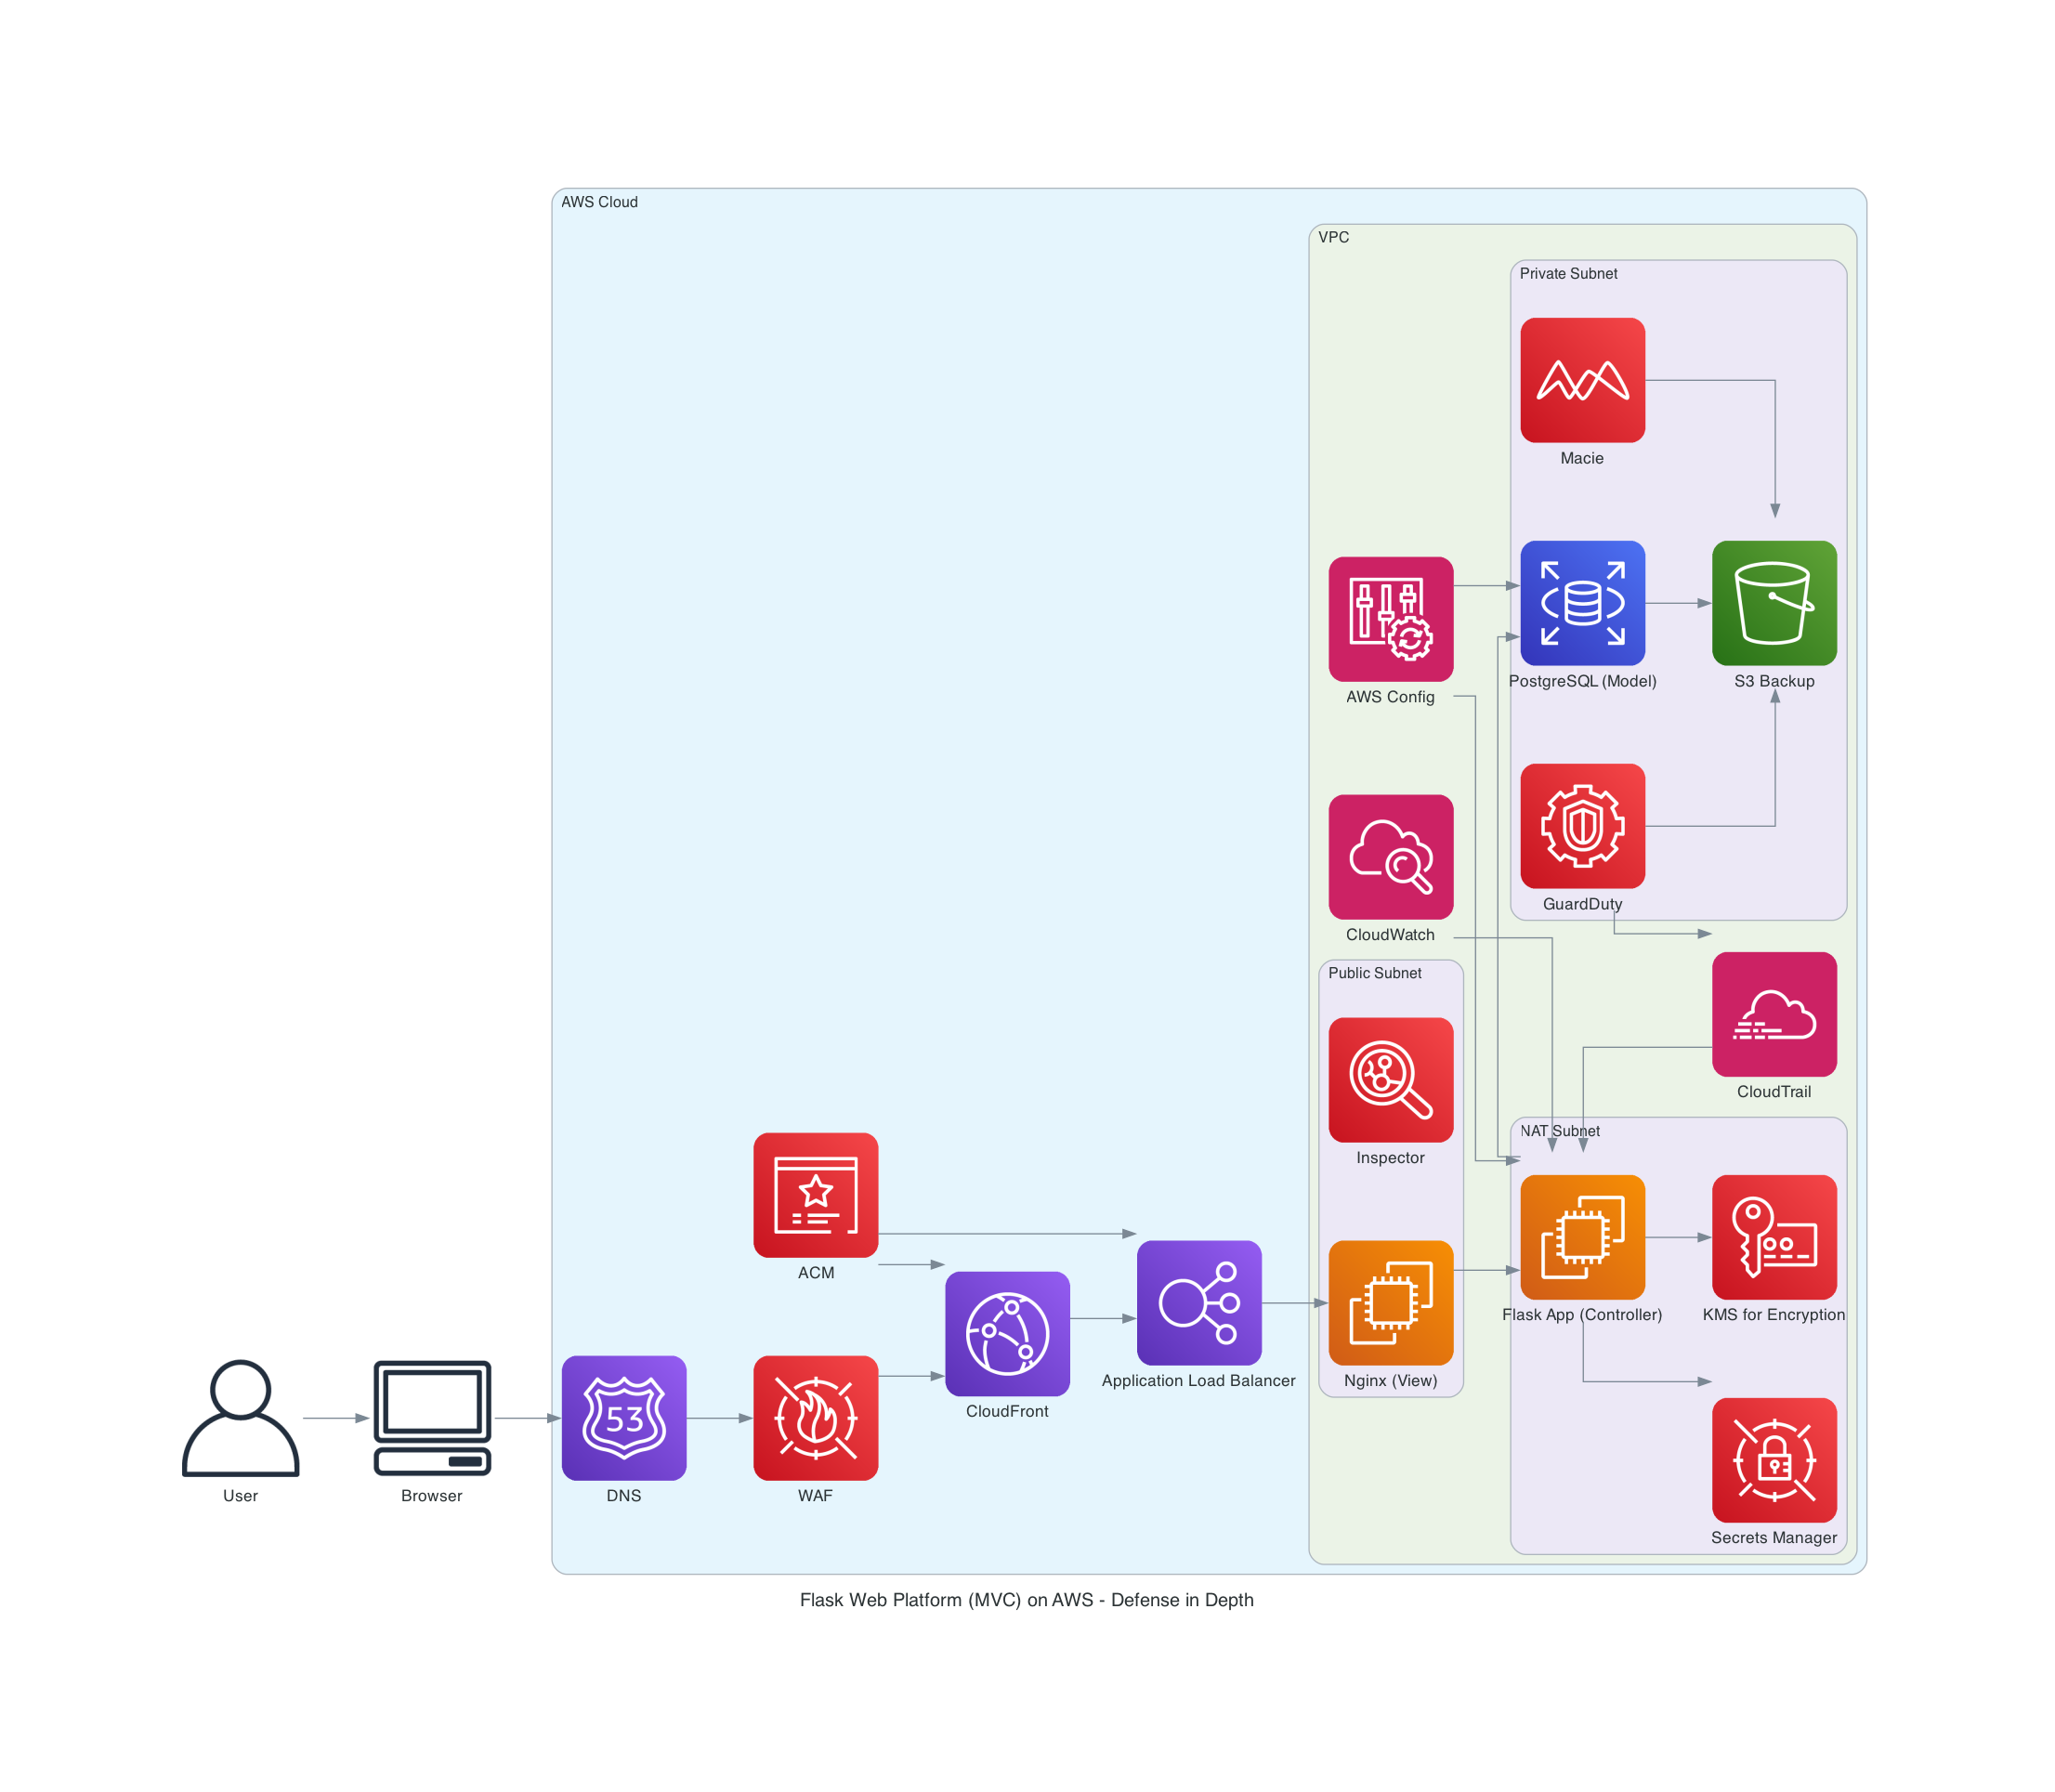

In [6]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB, CloudFront, VPC, InternetGateway, Route53
from diagrams.aws.compute import EC2, Lambda
from diagrams.aws.database import RDS
from diagrams.aws.general import User
from diagrams.aws.security import WAF, SecretsManager, Guardduty, Inspector, Macie, CertificateManager, KMS
from diagrams.aws.management import Cloudwatch, Cloudtrail, Config
from diagrams.aws.storage import S3
from diagrams.onprem.client import Client

from IPython.display import Image

with Diagram("Flask Web Platform (MVC) on AWS - Defense in Depth", show=False, outformat="png", filename="flask_mvc_aws_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        # Perimeter Protection
        dns = Route53("DNS")                          # DNS layer
        waf = WAF("WAF")                              # Web Application Firewall (Defense in Depth)
        cdn = CloudFront("CloudFront")                # CDN and DDoS mitigation (Defense in Depth)
        lb = ELB("Application Load Balancer")         # Entry point to backend (Defense in Depth)
        acm = CertificateManager("ACM")               # SSL/TLS certs for secure transport

        with Cluster("VPC"):
            with Cluster("Public Subnet"):
                nginx = EC2("Nginx (View)")            # Web server exposed to public
                inspector = Inspector("Inspector")      # Security scanning (Defense in Depth)

            with Cluster("NAT Subnet"):
                ec2 = EC2("Flask App (Controller)")     # App layer behind NAT
                secrets = SecretsManager("Secrets Manager")  # Secure secrets store (Defense in Depth)
                kms = KMS("KMS for Encryption")         # Encryption of root disks, secrets, backups

            with Cluster("Private Subnet"):
                db = RDS("PostgreSQL (Model)")          # Database in private subnet (Defense in Depth)
                backup = S3("S3 Backup")                 # Representing backup storage with S3 (Defense in Depth)
                guardduty = Guardduty("GuardDuty")       # Threat detection (Defense in Depth)
                macie = Macie("Macie")                   # Sensitive data discovery for S3 (Defense in Depth)

            # Monitoring and auditing (Defense in Depth)
            cloudwatch = Cloudwatch("CloudWatch")       # Logs and metrics
            cloudtrail = Cloudtrail("CloudTrail")       # API call auditing
            config = Config("AWS Config")               # Resource compliance monitoring

            # Application flow
            nginx >> ec2 >> db
            ec2 >> secrets
            ec2 >> kms
            db >> backup

            # Security monitoring and compliance
            guardduty >> backup                         # Monitors S3 for data exfiltration
            guardduty >> cloudtrail                     # Analyzes API activity logs
            macie >> backup                             # Scans S3 for sensitive data
            config >> db                                # Tracks config drift for DB
            config >> ec2                               # Tracks config drift for App

        # Ingress flow through AWS-managed edge layers
        dns >> waf >> cdn >> lb >> nginx
        acm >> lb
        acm >> cdn
        cloudwatch >> ec2
        cloudtrail >> ec2

    # External access path
    user >> browser >> dns

Image(filename="flask_mvc_aws_arch.png")


### Web Infrastructure using Defense in Depth on Azure

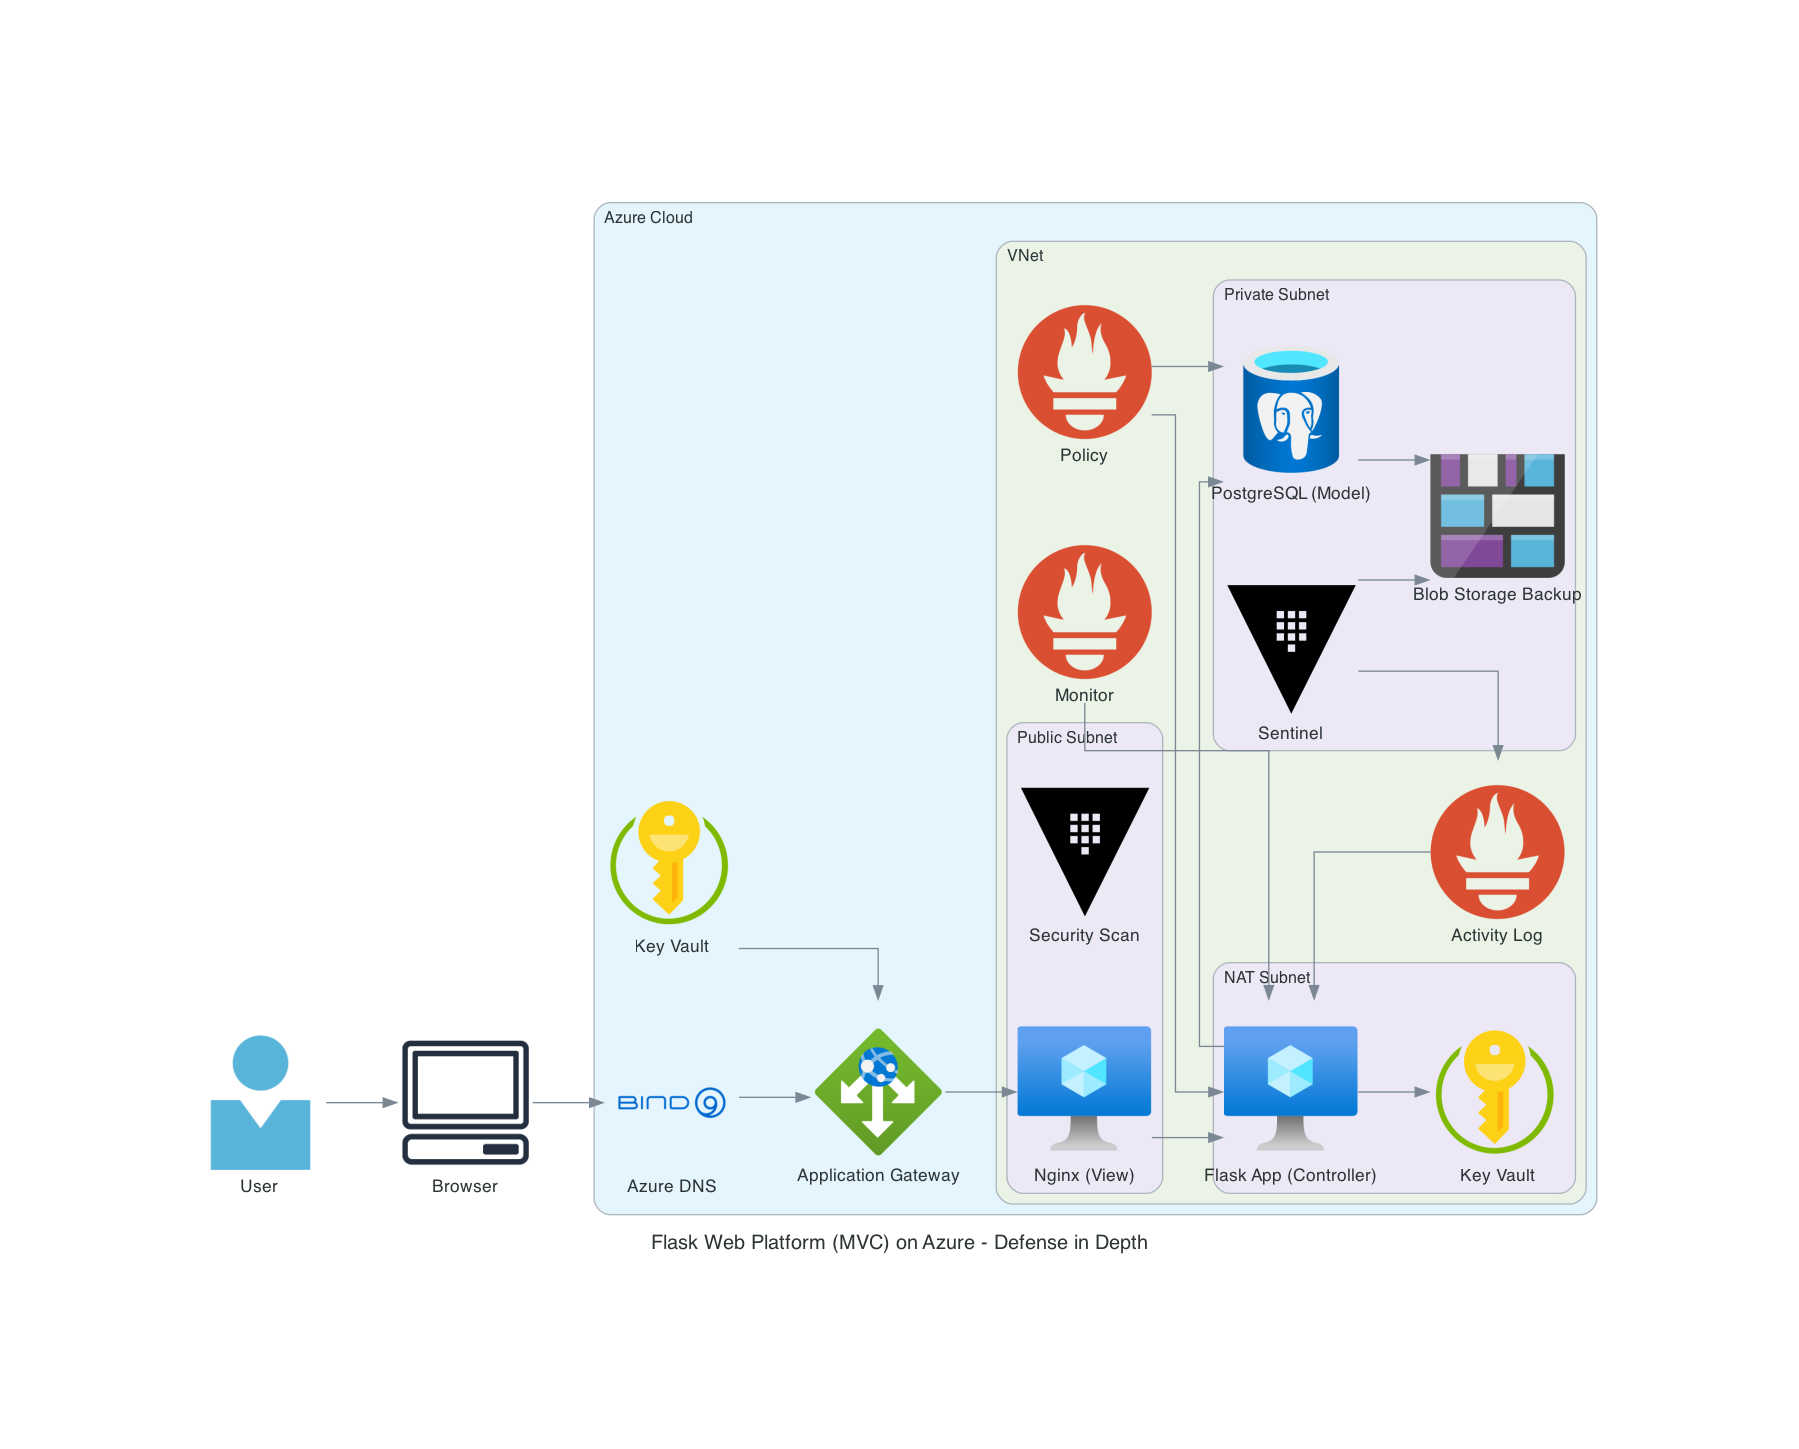

In [7]:
from diagrams import Diagram, Cluster
from diagrams.azure.network import ApplicationGateway, VirtualNetworks
from diagrams.azure.compute import VM
from diagrams.azure.database import DatabaseForPostgresqlServers
from diagrams.azure.general import Usericon
from diagrams.azure.storage import BlobStorage as Storage  # For Blob Storage (backup)
from diagrams.azure.security import KeyVaults as KeyVault  # For secrets and certificates
from diagrams.onprem.client import Client
from diagrams.onprem.network import Bind9  # Generic DNS
from diagrams.onprem.monitoring import Prometheus  # Fallback for CloudWatch/Monitor
from diagrams.onprem.security import Vault  # Fallback for GuardDuty/Sentinel

from IPython.display import Image

with Diagram("Flask Web Platform (MVC) on Azure - Defense in Depth", show=False, outformat="png", filename="flask_mvc_azure_arch"):

    user = Usericon("User")
    browser = Client("Browser")

    with Cluster("Azure Cloud"):
        # Perimeter Protection
        dns = Bind9("Azure DNS")                      # DNS layer
        lb = ApplicationGateway("Application Gateway")  # Load balancer with WAF
        kv = KeyVault("Key Vault")                    # Certificates and secrets (replacing ACM)

        with Cluster("VNet"):
            with Cluster("Public Subnet"):
                nginx = VM("Nginx (View)")            # Web server exposed to public
                # Inspector equivalent (Security Center not in diagrams.azure.security in your version)
                inspector = Vault("Security Scan")     # Generic fallback for vulnerability scanning

            with Cluster("NAT Subnet"):
                app = VM("Flask App (Controller)")     # App layer behind NAT
                secrets = KeyVault("Key Vault")        # Secure secrets and encryption (SecretsManager + KMS)

            with Cluster("Private Subnet"):
                db = DatabaseForPostgresqlServers("PostgreSQL (Model)")  # Database in private subnet
                backup = Storage("Blob Storage Backup")  # Azure Blob Storage for backups
                sentinel = Vault("Sentinel")            # Threat detection and sensitive data (GuardDuty + Macie fallback)

            # Monitoring and auditing (Defense in Depth)
            monitor = Prometheus("Monitor")            # Fallback for Azure Monitor (CloudWatch equivalent)
            # ActivityLog and Policy not directly available; using generics
            activity = Prometheus("Activity Log")      # Fallback for CloudTrail
            policy = Prometheus("Policy")              # Fallback for Config

            # Application flow
            nginx >> app >> db
            app >> secrets
            db >> backup

            # Security monitoring and compliance
            sentinel >> backup                        # Monitors storage for threats
            sentinel >> activity                      # Analyzes activity logs
            policy >> db                              # Tracks config drift for DB
            policy >> app                             # Tracks config drift for App

        # Ingress flow through Azure-managed edge layers
        dns >> lb >> nginx
        kv >> lb                                      # Certificates for secure transport

        # Monitoring connections
        monitor >> app
        activity >> app

    # External access path
    user >> browser >> dns

Image(filename="flask_mvc_azure_arch.png")

## Zero Trust Architecture

**Zero Trust** assumes no trust by default, requiring continuous verification.

### Core Principles
- **Never Trust, Always Verify**: Continuous authentication.
- **Least Privilege**: Minimal access rights.
- **Continuous Monitoring**: Ongoing activity checks.

### When to Use
- Cloud, hybrid, or remote work environments.
- High-security data protection needs.

### When Not to Use
- Small, low-risk setups.
- Resource-constrained organizations.

### Appropriate Platforms
- Cloud services, remote setups, multi-partner ecosystems.

### Usage
- **How Widely Used**: Growing in cloud transitions.
- **What It’s Used For**: Regulatory compliance (e.g., finance).

### Issues
- **Complexity**: Significant infrastructure changes.
- **User Experience**: Strict controls may hinder productivity.

### Well-Known Problems
- **Visibility**: Hard to monitor everything.
- **False Positives**: Over-monitoring issues.

### Known Cybersecurity Incidents
- **SolarWinds (2020)**: Supply chain attack.
- **Colonial Pipeline (2021)**: Access control failure.

**Reference**: NIST SP 800-207. (2020). *Zero Trust Architecture*. https://nvlpubs.nist.gov/nistpubs/SpecialPublications/NIST.SP.800-207.pdf

In [8]:
from tabulate import tabulate

# Updated Zero Trust Table with Azure services
zta_data = [
    ["Identity Verification", "IAM Identity Center", "Azure AD", "Ensure user authentication and least privilege access"],
    ["Device Trust", "Inspector", "Azure Security Center", "Verify and assess compute instance security posture"],
    ["Application Access", "WAF, ELB, Secrets Manager", "Azure Front Door, Azure Load Balancer, Azure Key Vault", "Control access to the app and secure secret handling"],
    ["Least Privilege", "IAM policies and roles", "Azure AD RBAC", "Restrict access per job function and dynamic needs"],
    ["Network Segmentation", "VPC, Public/Private Subnets", "VNet, Subnets", "Limit lateral movement and isolate workloads"],
    ["Encryption", "KMS, ACM, Secrets Manager", "Azure Key Vault", "Encrypt data at rest and in transit"],
    ["Continuous Monitoring", "CloudWatch, CloudTrail, Config", "Azure Monitor, Azure Activity Log, Azure Policy", "Log activity and audit continuously"],
    ["Threat Detection", "GuardDuty, Macie, Inspector", "Azure Defender, Azure Sentinel, Azure Security Center", "Detect anomalous activity and data exposure"],
    ["Data Access Control", "S3 Policies, Secrets Manager", "Blob Storage Policies, Azure Key Vault", "Restrict and log sensitive data access"],
    ["Data Exfiltration Protection", "Macie, GuardDuty", "Azure Sentinel, Azure Defender", "Detect and block abnormal outbound data flows"]
]

# Updated headers for display
headers = ["ZTA Pillar", "AWS Controls", "Azure Controls", "Purpose"]

# Print as a nice table
print(tabulate(zta_data, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════════╤════════════════════════════════╤════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════╕
│ ZTA Pillar                   │ AWS Controls                   │ Azure Controls                                         │ Purpose                                               │
╞══════════════════════════════╪════════════════════════════════╪════════════════════════════════════════════════════════╪═══════════════════════════════════════════════════════╡
│ Identity Verification        │ IAM Identity Center            │ Azure AD                                               │ Ensure user authentication and least privilege access │
├──────────────────────────────┼────────────────────────────────┼────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────┤
│ Device Trust                 │ Inspector                      │ Azure Security Center                  

### Zero Trust Architecture using AWS

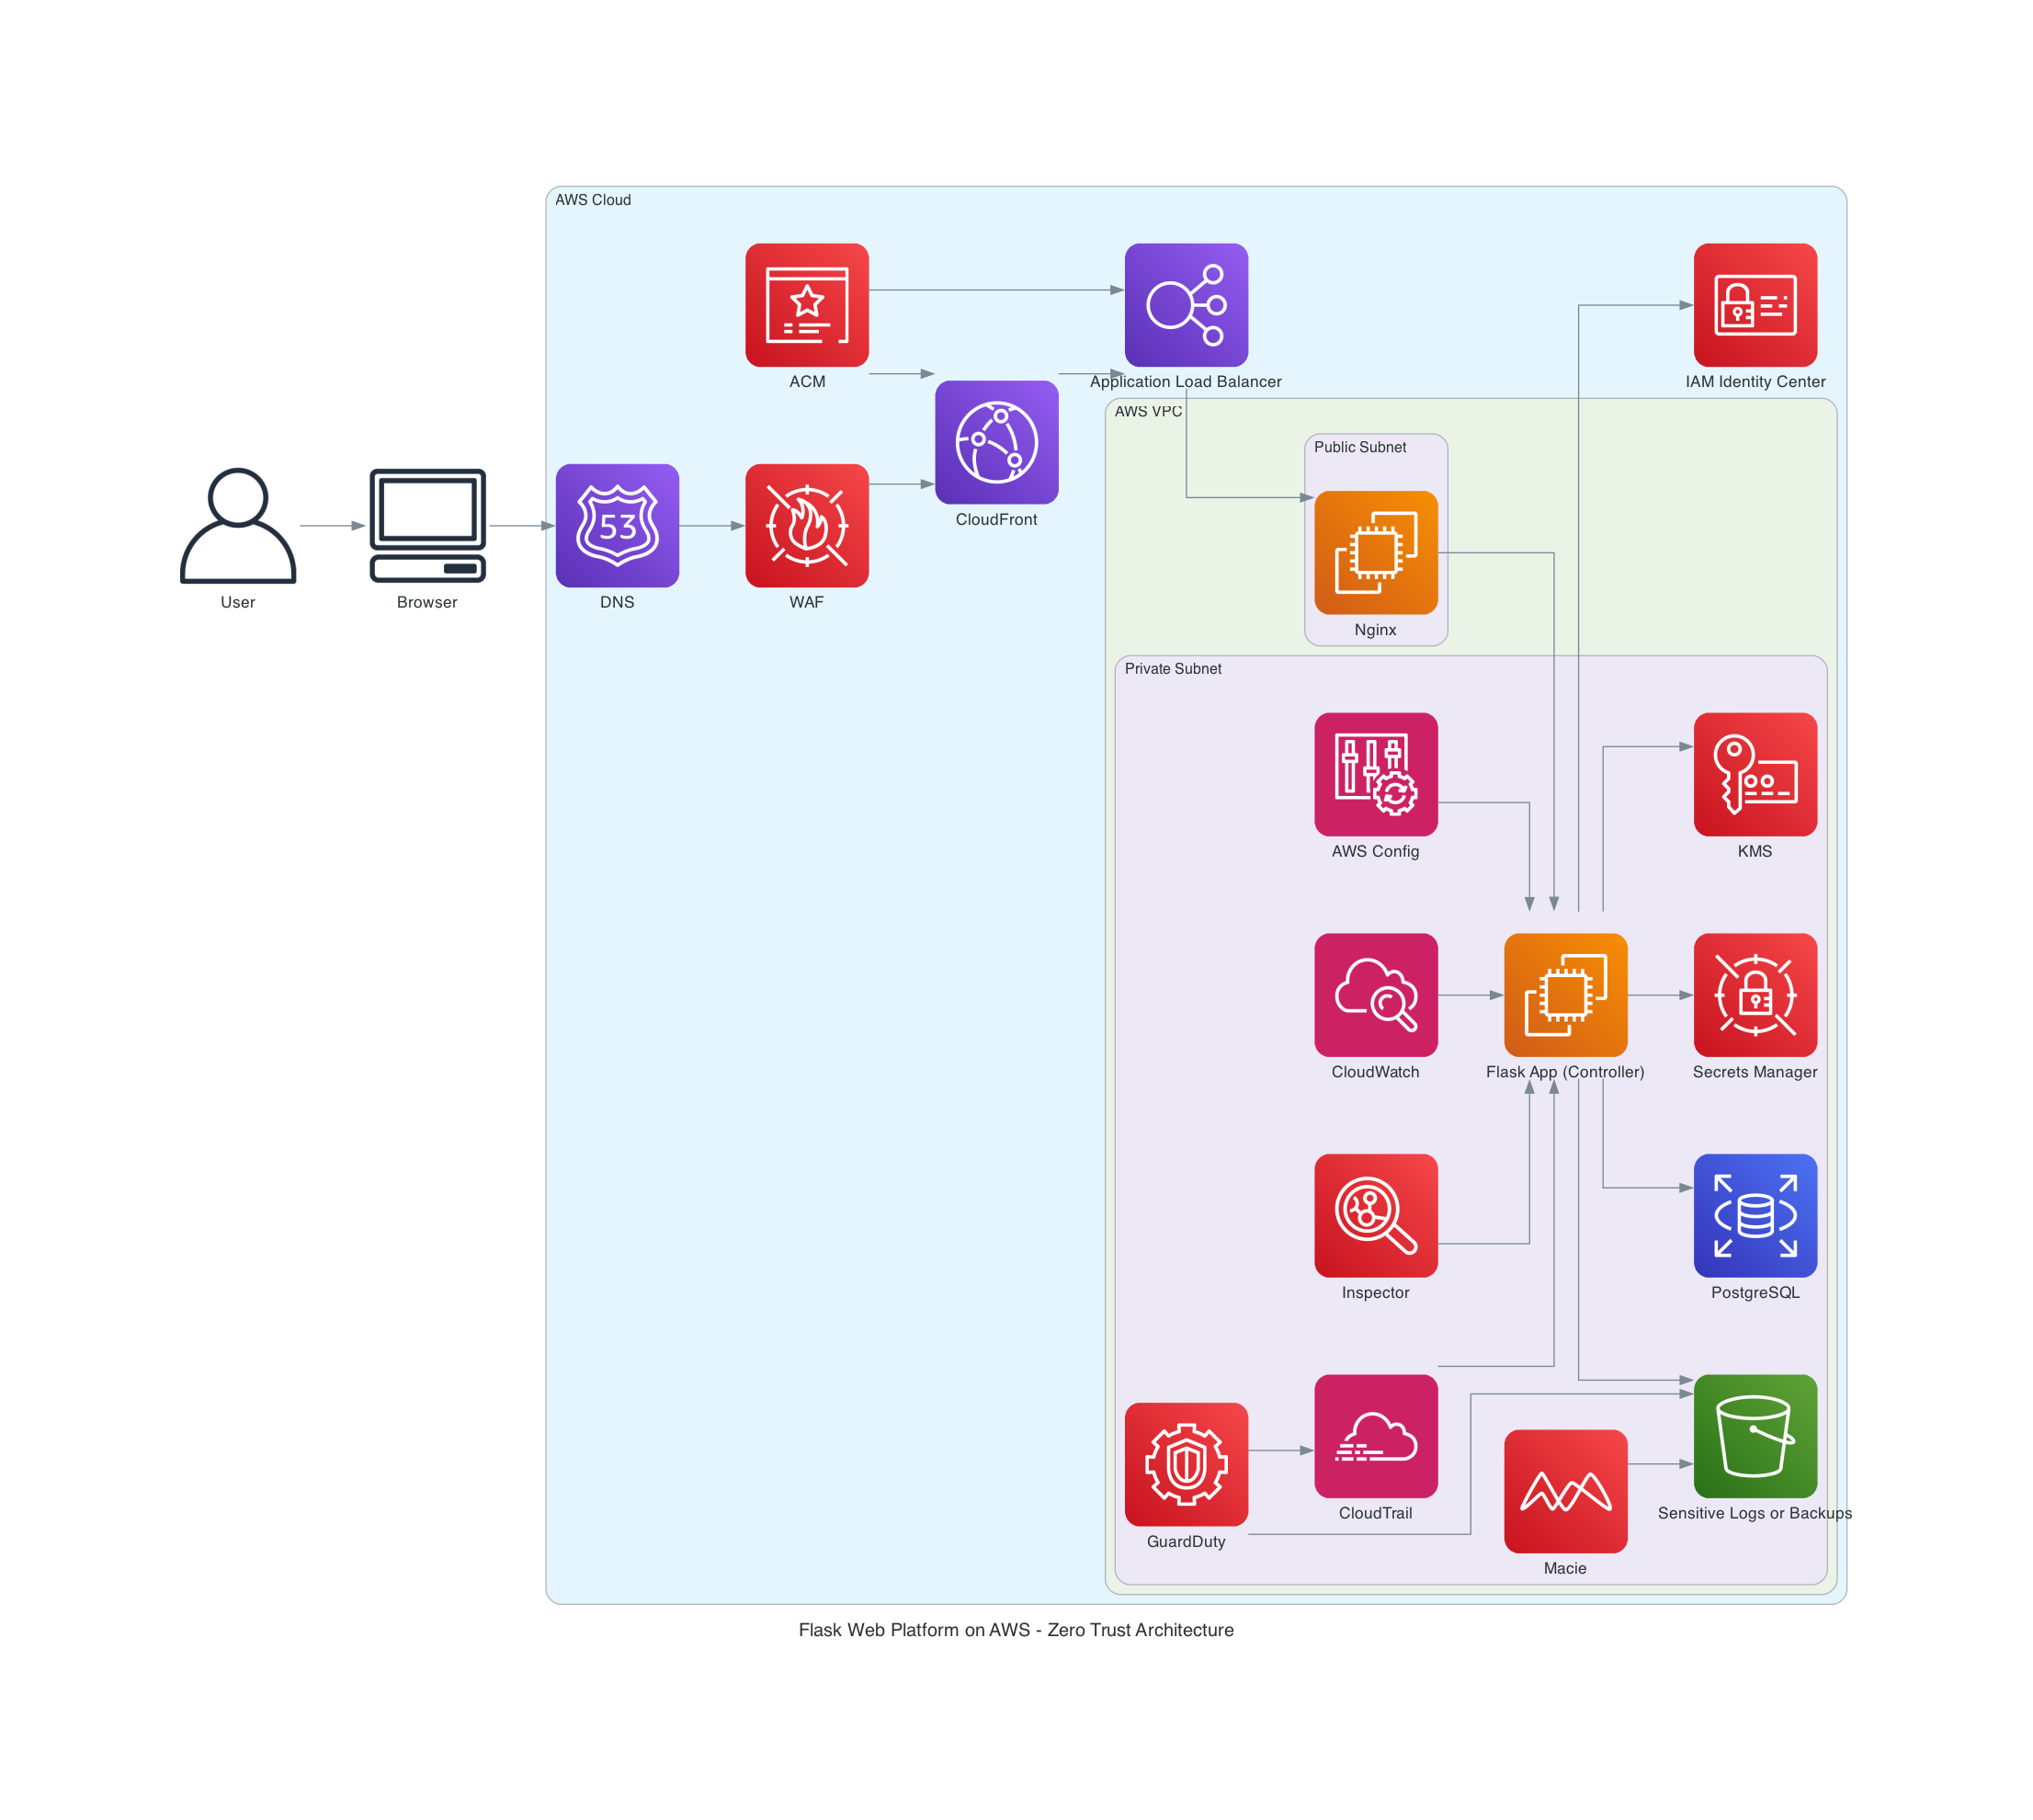

In [9]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB, CloudFront, VPC as AWSVPC, Route53
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.general import User
from diagrams.aws.security import WAF, SecretsManager, Guardduty, Inspector, Macie, CertificateManager, KMS, IAM
from diagrams.aws.management import Cloudwatch, Cloudtrail, Config
from diagrams.aws.storage import S3
from diagrams.onprem.client import Client
from tabulate import tabulate

from IPython.display import Image

# Zero Trust Architecture diagram (independent of Defense in Depth)
with Diagram("Flask Web Platform on AWS - Zero Trust Architecture", show=False, outformat="png", filename="flask_zta_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        dns = Route53("DNS")
        waf = WAF("WAF")
        cdn = CloudFront("CloudFront")
        lb = ELB("Application Load Balancer")
        acm = CertificateManager("ACM")
        identity = IAM("IAM Identity Center")

        with Cluster("AWS VPC"):
            with Cluster("Public Subnet"):
                nginx = EC2("Nginx")

            with Cluster("Private Subnet"):
                app = EC2("Flask App (Controller)")
                rds = RDS("PostgreSQL")
                secrets = SecretsManager("Secrets Manager")
                kms = KMS("KMS")
                inspector = Inspector("Inspector")
                macie = Macie("Macie")
                guardduty = Guardduty("GuardDuty")
                cloudwatch = Cloudwatch("CloudWatch")
                cloudtrail = Cloudtrail("CloudTrail")
                config = Config("AWS Config")
                s3 = S3("Sensitive Logs or Backups")

        browser >> dns >> waf >> cdn >> lb >> nginx >> app >> rds
        app >> secrets
        app >> kms
        app >> identity
        app >> s3
        macie >> s3
        guardduty >> s3
        guardduty >> cloudtrail
        inspector >> app
        cloudwatch >> app
        cloudtrail >> app
        config >> app
        acm >> lb
        acm >> cdn

    user >> browser

Image(filename="flask_zta_arch.png")


### Zero Trust Architecture using Azure

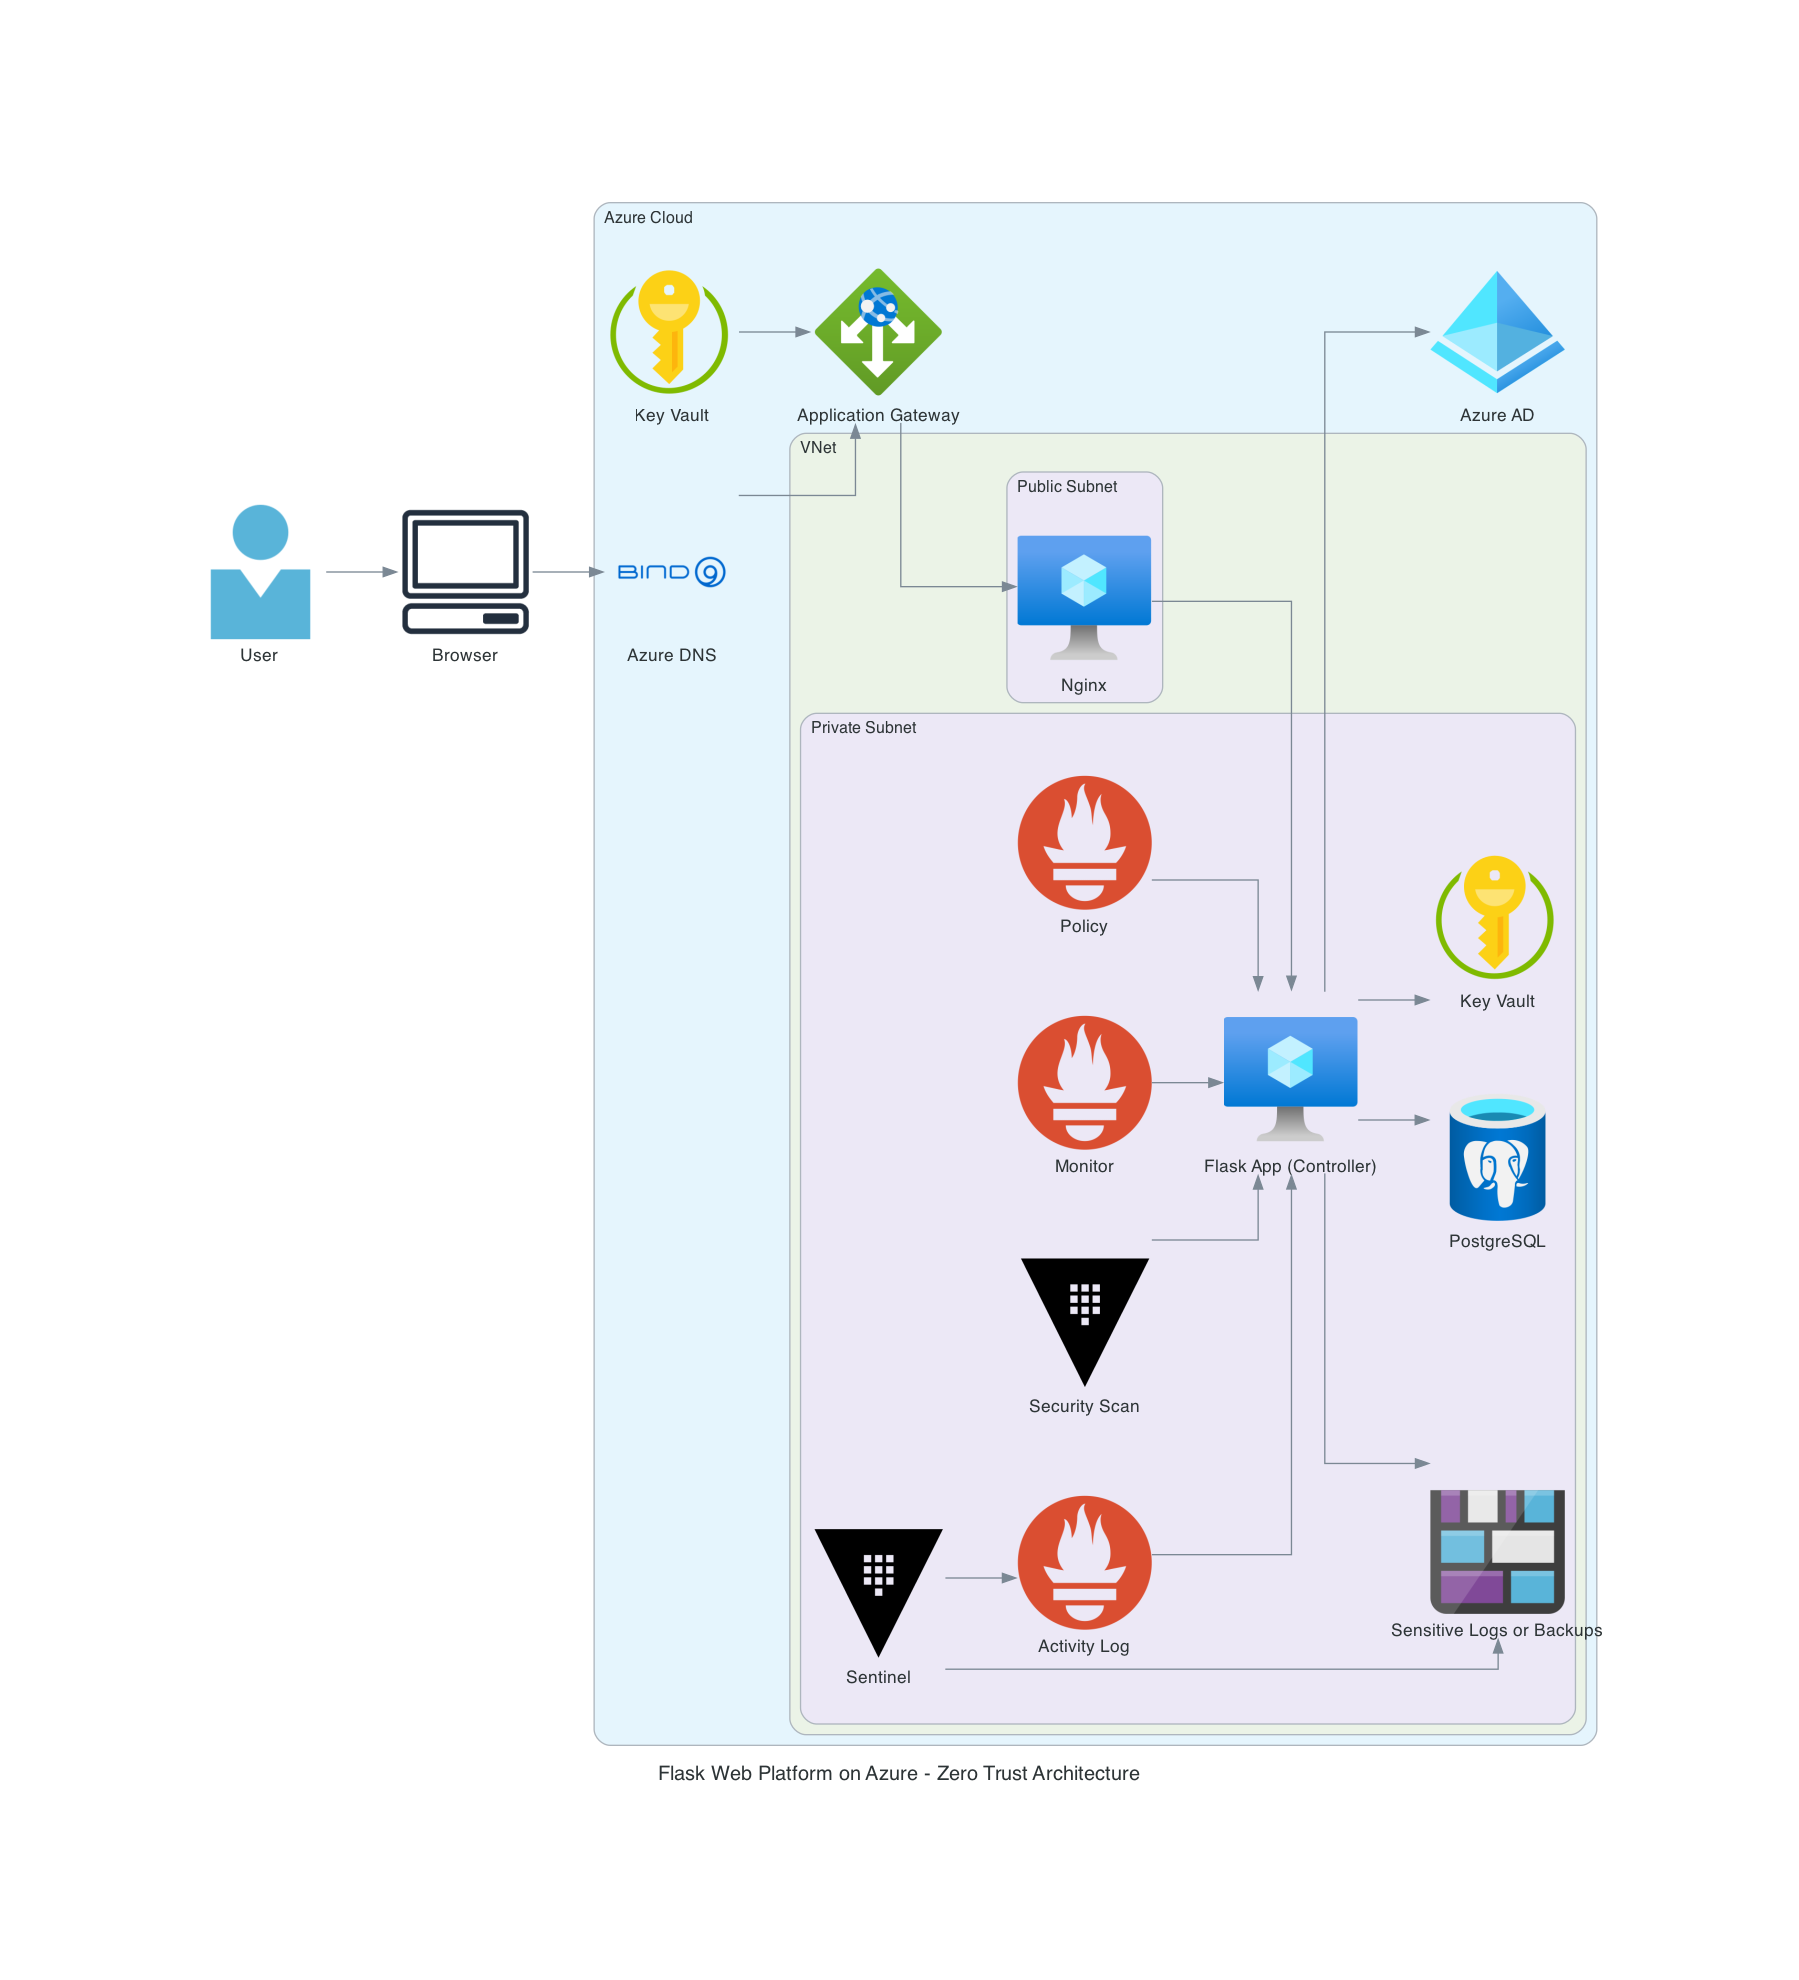

In [10]:
from diagrams import Diagram, Cluster
from diagrams.azure.network import ApplicationGateway, VirtualNetworks
from diagrams.azure.compute import VM
from diagrams.azure.database import DatabaseForPostgresqlServers
from diagrams.azure.general import Usericon
from diagrams.azure.storage import BlobStorage as Storage  # For Blob Storage (backup)
from diagrams.azure.security import KeyVaults  # For secrets and certificates
from diagrams.azure.identity import ActiveDirectory as AzureAD  # For identity (if available)
from diagrams.onprem.client import Client
from diagrams.onprem.network import Bind9  # Generic DNS
from diagrams.onprem.monitoring import Prometheus  # Fallback for monitoring
from diagrams.onprem.security import Vault  # Fallback for security services

from IPython.display import Image

with Diagram("Flask Web Platform on Azure - Zero Trust Architecture", show=False, outformat="png", filename="flask_zta_azure_arch"):

    user = Usericon("User")
    browser = Client("Browser")

    with Cluster("Azure Cloud"):
        dns = Bind9("Azure DNS")
        lb = ApplicationGateway("Application Gateway")  # Includes WAF
        kv = KeyVault("Key Vault")                      # Certificates and secrets
        identity = AzureAD("Azure AD")                  # Identity verification (ZTA pillar)

        with Cluster("VNet"):
            with Cluster("Public Subnet"):
                nginx = VM("Nginx")

            with Cluster("Private Subnet"):
                app = VM("Flask App (Controller)")
                rds = DatabaseForPostgresqlServers("PostgreSQL")
                secrets = KeyVault("Key Vault")         # Secrets and encryption (ZTA pillar)
                inspector = Vault("Security Scan")      # Device trust and app scanning (ZTA pillar)
                sentinel = Vault("Sentinel")            # Threat detection and data protection (ZTA pillar)
                monitor = Prometheus("Monitor")         # Continuous monitoring (ZTA pillar)
                activity = Prometheus("Activity Log")   # Auditing (ZTA pillar)
                policy = Prometheus("Policy")           # Compliance (ZTA pillar)
                s3 = Storage("Sensitive Logs or Backups")  # Data access control (ZTA pillar)

        # Zero Trust flow: explicit verification at each step
        browser >> dns >> lb >> nginx >> app >> rds
        app >> secrets                            # Least privilege secrets access
        app >> identity                           # Identity verification
        app >> s3                                 # Data access control
        sentinel >> s3                            # Threat detection and data exfiltration protection
        sentinel >> activity                      # Analyze activity logs for anomalies
        inspector >> app                          # Verify app security posture
        monitor >> app                            # Continuous monitoring
        activity >> app                           # Audit app activity
        policy >> app                             # Enforce compliance
        kv >> lb                                  # Secure transport with certificates

    user >> browser

Image(filename="flask_zta_azure_arch.png")

## TOGAF Security Architecture

**TOGAF** provides a structured enterprise architecture approach.

### Core Principles
- **ADM**: Step-by-step architecture development.
- **Enterprise Continuum**: Organizes artifacts.
- **Content Framework**: Defines deliverables.

### When to Use
- Large enterprises aligning IT with business.
- Complex IT environments.

### When Not to Use
- Small projects needing lightweight frameworks.
- Immature organizations.

### Appropriate Platforms
- Large enterprises, government agencies.

### Usage
- **How Widely Used**: Broad in enterprise architecture.
- **What It’s Used For**: Standardized IT systems.

### Issues
- **Complexity**: Overwhelming for small setups.
- **Resources**: Time and expertise heavy.

### Well-Known Problems
- **Documentation**: Over-focus on paperwork.
- **Adaptability**: Slow to adapt to tech changes.

### Known Cybersecurity Incidents
- No specific breaches tied to TOGAF; generic enterprise failures apply.

**Reference**: The Open Group. (2018). *TOGAF 9.2*. https://www.opengroup.org/togaf

In [11]:
from tabulate import tabulate

# Updated TOGAF Security Architecture Table with Azure services
togaf_data = [
    ["Business Architecture", "IAM Identity Center", "Azure AD", "Define roles, responsibilities, and access governance"],
    ["Application Architecture", "WAF, ELB, Flask App, Secrets Manager", "Application Gateway, VM (Flask App), Key Vault", "Secure application-level interactions and secret use"],
    ["Data Architecture", "RDS, S3, KMS", "Database for PostgreSQL Servers, Blob Storage, Key Vault", "Protect structured and unstructured data, enable encryption"],
    ["Technology Architecture", "VPC, Route53, CloudFront, ACM", "Virtual Network, Azure DNS, Application Gateway, Key Vault", "Ensure secure infrastructure and trusted access layers"],
    ["Architecture Governance", "CloudWatch, CloudTrail, Config, Inspector, GuardDuty, Macie", "Azure Monitor, Activity Log, Policy, Security Center, Sentinel", "Monitor, audit, detect and enforce security policies"]
]

# Updated headers for display
headers = ["TOGAF Domain", "AWS Controls", "Azure Controls", "Purpose"]

# Print as a nice table
print(tabulate(togaf_data, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════╕
│ TOGAF Domain             │ AWS Controls                                                │ Azure Controls                                                 │ Purpose                                                     │
╞══════════════════════════╪═════════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════════╡
│ Business Architecture    │ IAM Identity Center                                         │ Azure AD                                                       │ Define roles, responsibilities, and access governance       │
├──────────────────────────┼─────────────────────────────────────────────────────────────┼──────────────────────────────────────

### TOGAF Security Architecture on AWS

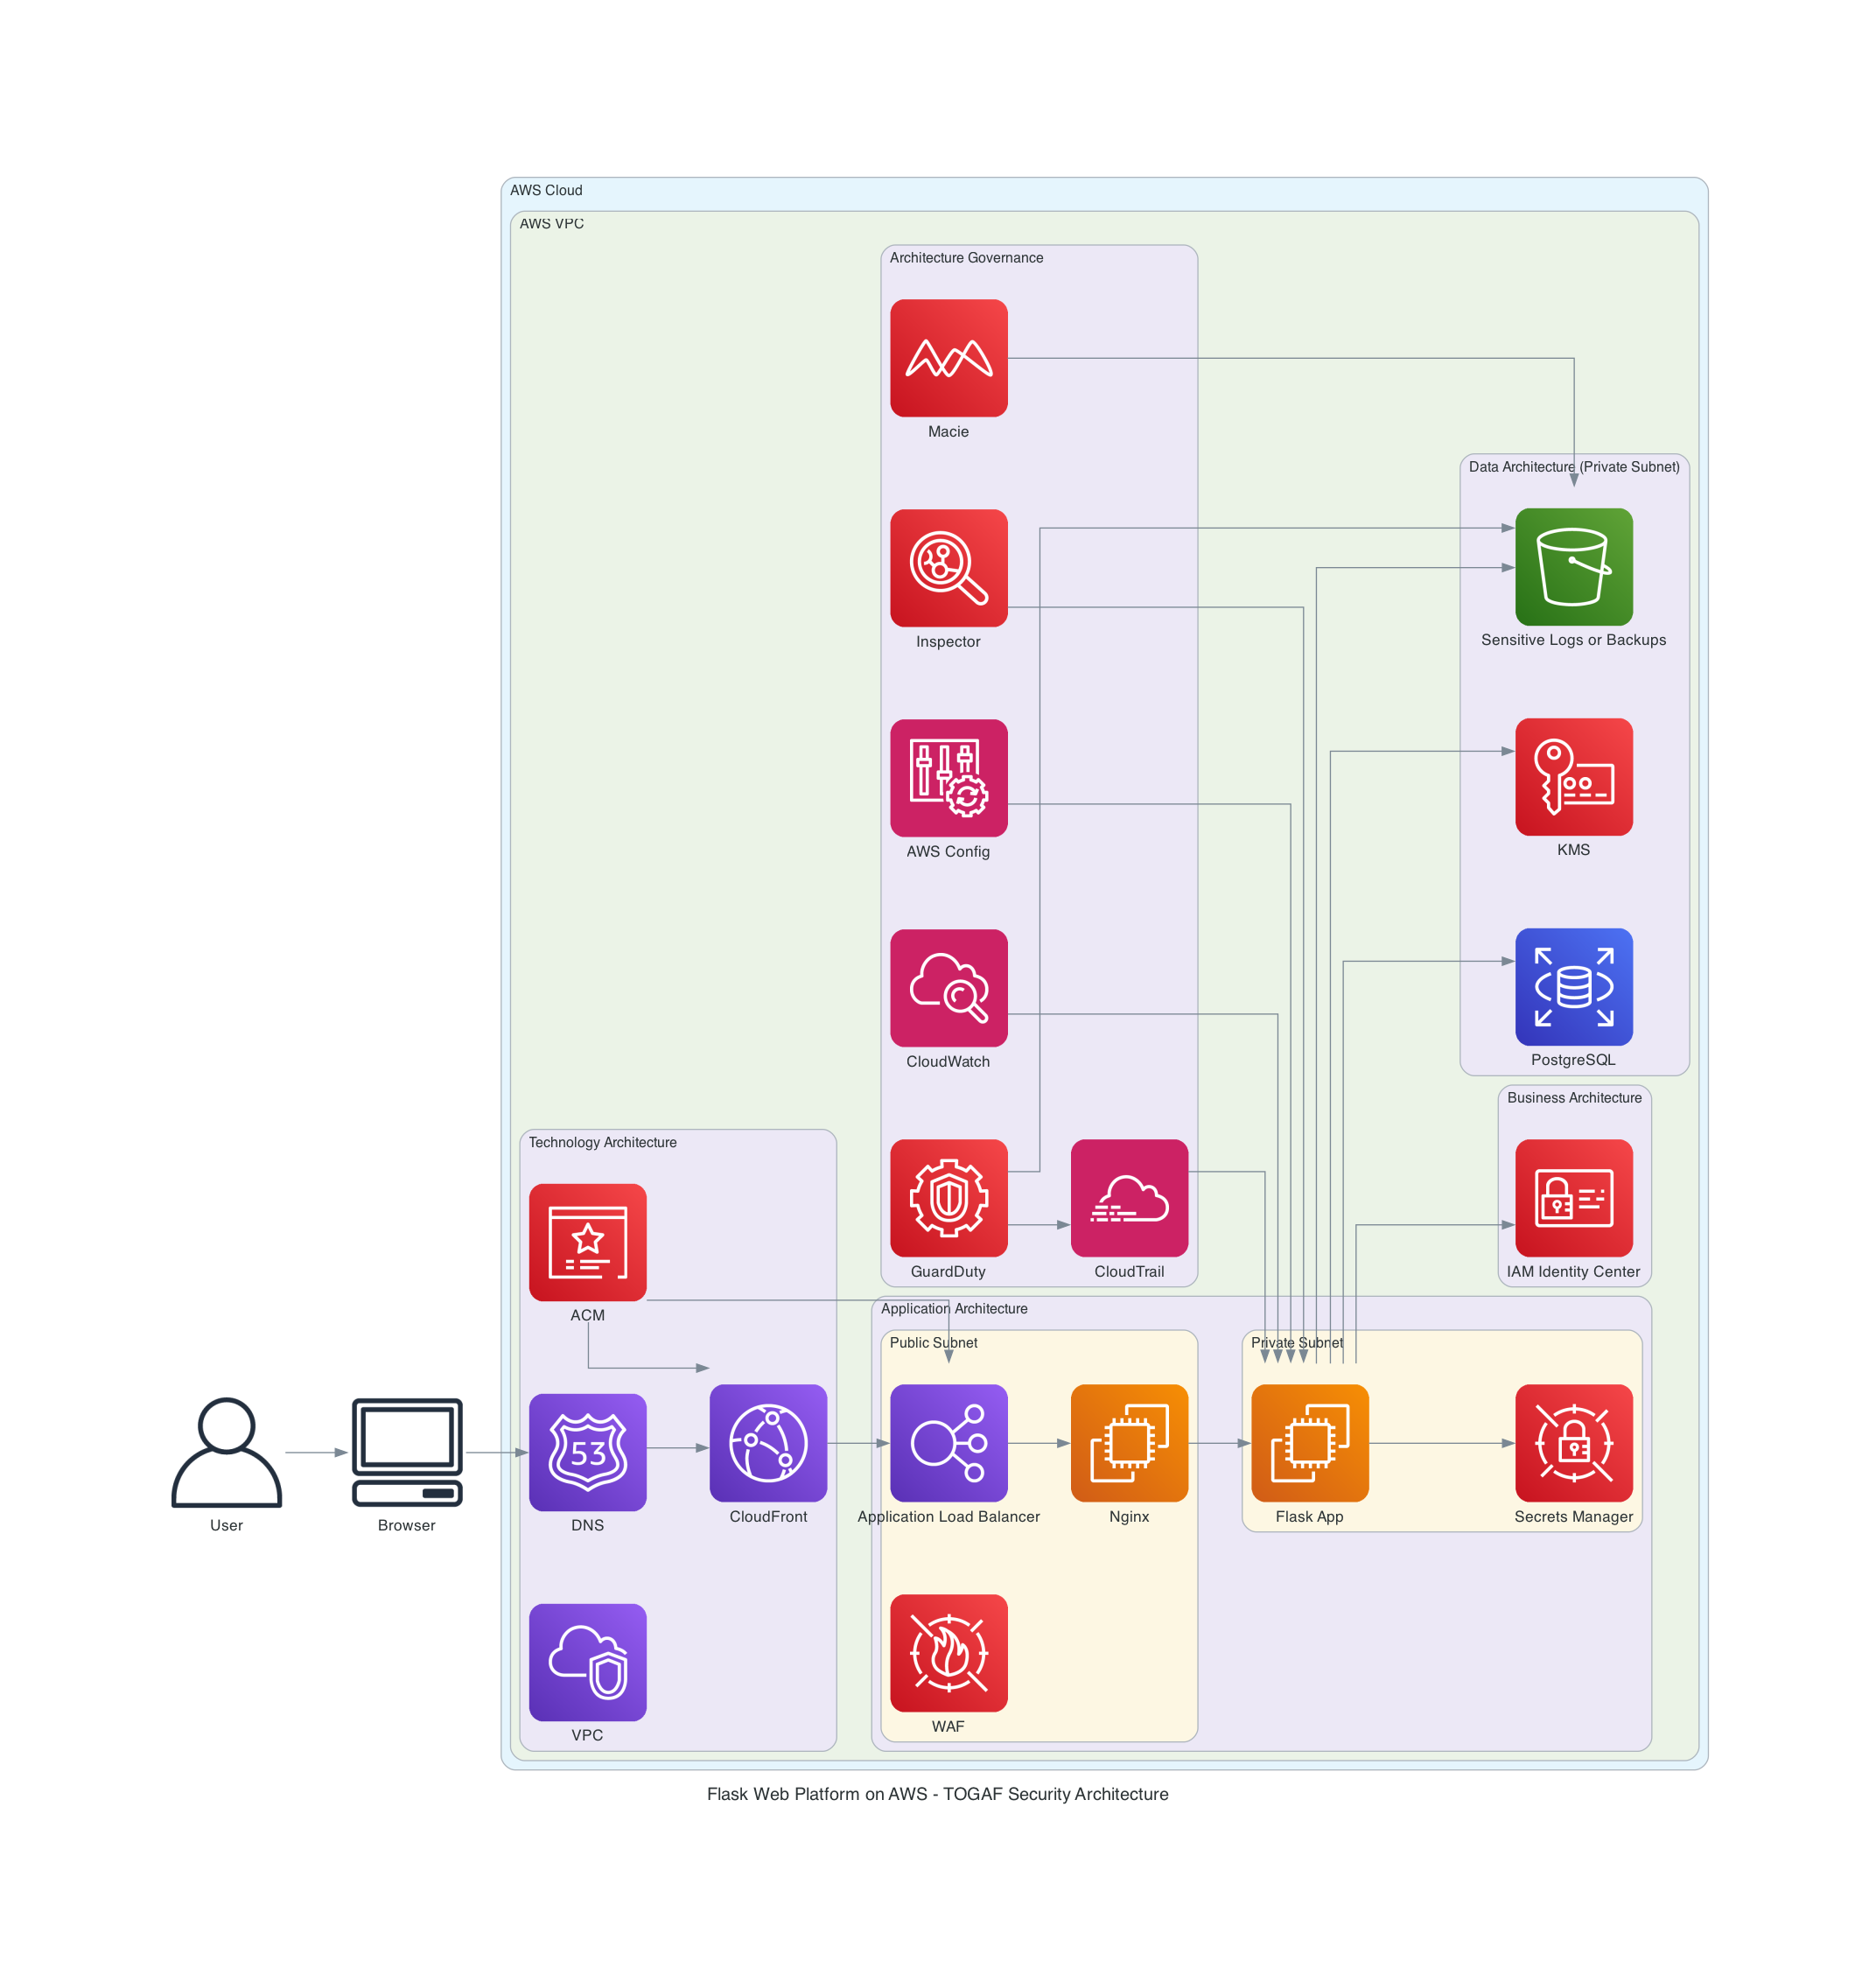

In [12]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB, CloudFront, VPC as AWSVPC, Route53
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.general import User
from diagrams.aws.security import WAF, SecretsManager, Guardduty, Inspector, Macie, CertificateManager, KMS, IAM
from diagrams.aws.management import Cloudwatch, Cloudtrail, Config
from diagrams.aws.storage import S3
from diagrams.onprem.client import Client
from tabulate import tabulate

from IPython.display import Image

# TOGAF Security Architecture Diagram with Subnet Context
with Diagram("Flask Web Platform on AWS - TOGAF Security Architecture", show=False, outformat="png", filename="flask_togaf_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        with Cluster("AWS VPC"):
            with Cluster("Business Architecture"):
                identity = IAM("IAM Identity Center")

            with Cluster("Application Architecture"):
                with Cluster("Public Subnet"):
                    waf = WAF("WAF")
                    lb = ELB("Application Load Balancer")
                    nginx = EC2("Nginx")

                with Cluster("Private Subnet"):
                    app = EC2("Flask App")
                    secrets = SecretsManager("Secrets Manager")

            with Cluster("Data Architecture (Private Subnet)"):
                rds = RDS("PostgreSQL")
                s3 = S3("Sensitive Logs or Backups")
                kms = KMS("KMS")

            with Cluster("Technology Architecture"):
                vpc = AWSVPC("VPC")
                cdn = CloudFront("CloudFront")
                dns = Route53("DNS")
                acm = CertificateManager("ACM")

            with Cluster("Architecture Governance"):
                cloudwatch = Cloudwatch("CloudWatch")
                cloudtrail = Cloudtrail("CloudTrail")
                config = Config("AWS Config")
                inspector = Inspector("Inspector")
                guardduty = Guardduty("GuardDuty")
                macie = Macie("Macie")

    # Flow connections
    user >> browser >> dns >> cdn >> lb >> nginx >> app >> rds
    app >> secrets
    app >> kms
    app >> identity
    app >> s3
    acm >> lb
    acm >> cdn
    macie >> s3
    guardduty >> s3
    guardduty >> cloudtrail
    inspector >> app
    cloudwatch >> app
    cloudtrail >> app
    config >> app

Image(filename="flask_togaf_arch.png")

## SABSA Security Architecture

**SABSA** aligns security with business objectives.

### Core Principles
- **Business-Driven**: Security reflects business needs.
- **Layered**: Contextual to component levels.
- **Risk-Based**: Controls based on risk.

### When to Use
- Aligning security with business goals.
- Structured security needs.

### When Not to Use
- Unclear business objectives.
- Simple frameworks suffice.

### Appropriate Platforms
- Complex enterprises (e.g., finance).

### Usage
- **How Widely Used**: Popular in business-aligned security.
- **What It’s Used For**: Business-security integration.

### Issues
- **Complexity**: Requires deep knowledge.
- **Resources**: Time-consuming.

### Well-Known Problems
- **Translation**: Business to tech gap.
- **Over-Engineering**: Complex solutions.

### Known Cybersecurity Incidents
- No direct SABSA breaches; enterprise failures apply.

**Reference**: Sherwood, J., et al. (2005). *Enterprise Security Architecture*. CMP Books.

In [13]:
from tabulate import tabulate

# Updated SABSA Security Architecture Table with Azure services
togaf_data = [
    ["Business Architecture", "IAM Identity Center", "Azure AD", "Define roles, responsibilities, and access governance"],
    ["Application Architecture", "WAF, ELB, Flask App, Secrets Manager", "Azure Front Door, Azure Load Balancer, App Service, Azure Key Vault", "Secure application-level interactions and secret use"],
    ["Data Architecture", "RDS, S3, KMS", "Azure SQL Database, Blob Storage, Azure Key Vault", "Protect structured and unstructured data, enable encryption"],
    ["Technology Architecture", "VPC, Route53, CloudFront, ACM", "VNet, Azure DNS, Azure CDN, Azure Key Vault", "Ensure secure infrastructure and trusted access layers"],
    ["Architecture Governance", "CloudWatch, CloudTrail, Config, Inspector, GuardDuty, Macie", "Azure Monitor, Azure Activity Log, Azure Policy, Azure Security Center, Azure Defender, Azure Sentinel", "Monitor, audit, detect and enforce security policies"]
]

# Updated headers for display
headers = ["TOGAF Domain", "AWS Controls", "Azure Controls", "Purpose"]

# Print as a nice table
print(tabulate(togaf_data, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════╤═════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════╕
│ TOGAF Domain             │ AWS Controls                                                │ Azure Controls                                                                                         │ Purpose                                                     │
╞══════════════════════════╪═════════════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════════╡
│ Business Architecture    │ IAM Identity Center                                         │ Azure AD                                                                                               │ Define roles, responsibilities

### SABSA Architecture on AWS

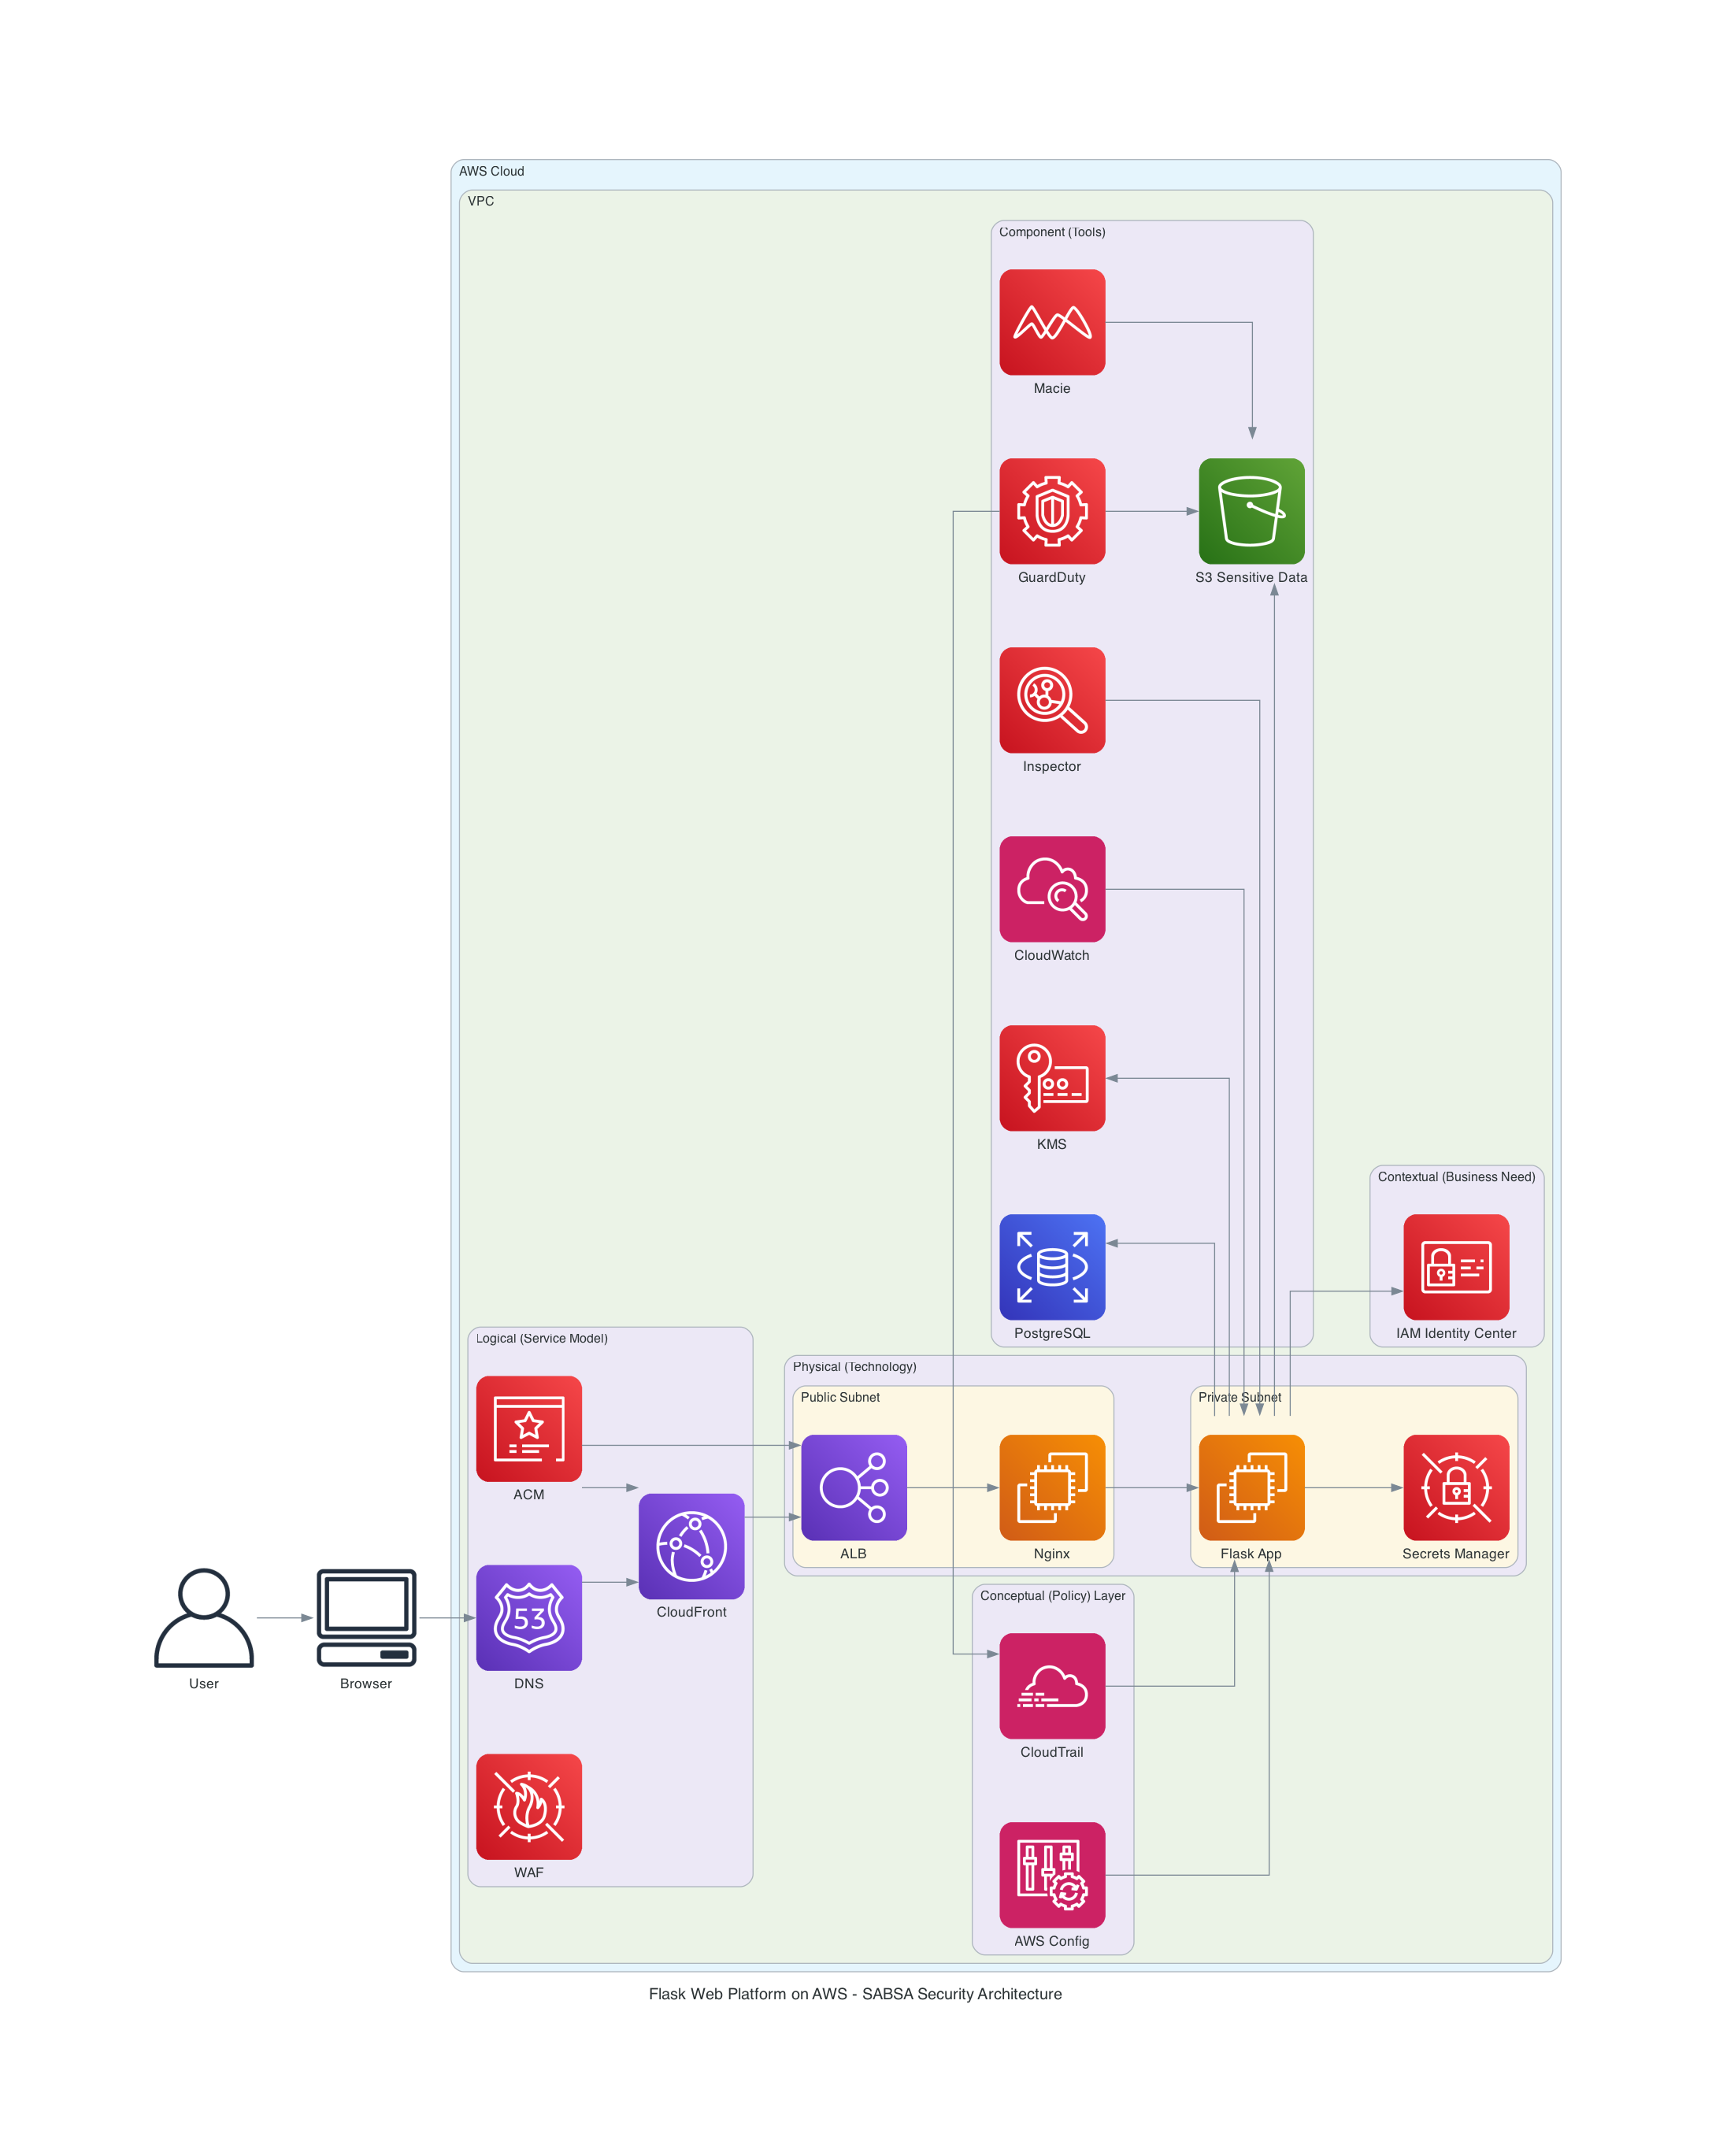

In [14]:
from diagrams import Diagram, Cluster
from diagrams.aws.network import ELB, CloudFront, VPC, Route53
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.general import User
from diagrams.aws.security import WAF, SecretsManager, Guardduty, Inspector, Macie, CertificateManager, KMS, IAM
from diagrams.aws.management import Cloudwatch, Cloudtrail, Config
from diagrams.aws.storage import S3
from diagrams.onprem.client import Client
from tabulate import tabulate

from IPython.display import Image

# SABSA Security Architecture Diagram
with Diagram("Flask Web Platform on AWS - SABSA Security Architecture", show=False, outformat="png", filename="flask_sabsa_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        with Cluster("VPC"):
            with Cluster("Contextual (Business Need)"):
                identity = IAM("IAM Identity Center")

            with Cluster("Conceptual (Policy) Layer"):
                config = Config("AWS Config")
                cloudtrail = Cloudtrail("CloudTrail")

            with Cluster("Logical (Service Model)"):
                waf = WAF("WAF")
                cdn = CloudFront("CloudFront")
                dns = Route53("DNS")
                acm = CertificateManager("ACM")

            with Cluster("Physical (Technology)"):
                with Cluster("Public Subnet"):
                    lb = ELB("ALB")
                    nginx = EC2("Nginx")

                with Cluster("Private Subnet"):
                    app = EC2("Flask App")
                    secrets = SecretsManager("Secrets Manager")

            with Cluster("Component (Tools)"):
                rds = RDS("PostgreSQL")
                s3 = S3("S3 Sensitive Data")
                kms = KMS("KMS")
                cloudwatch = Cloudwatch("CloudWatch")
                inspector = Inspector("Inspector")
                guardduty = Guardduty("GuardDuty")
                macie = Macie("Macie")

    # Flows
    user >> browser >> dns >> cdn >> lb >> nginx >> app >> rds
    app >> secrets
    app >> kms
    app >> identity
    app >> s3
    acm >> lb
    acm >> cdn
    macie >> s3
    guardduty >> s3
    guardduty >> cloudtrail
    inspector >> app
    cloudwatch >> app
    cloudtrail >> app
    config >> app

Image(filename="flask_sabsa_arch.png")




## SSDLC (Secure Software Development Life Cycle)

**SSDLC** integrates security into software development.

### Core Principles
- **Security by Design**: Embedded security.
- **Continuous Testing**: Regular security checks.
- **Risk Management**: Early risk mitigation.

### When to Use
- Software with sensitive data.
- High-risk environments.

### When Not to Use
- Small, low-risk projects.
- Teams lacking security skills.

### Appropriate Platforms
- Software in finance, healthcare, government.

### Usage
- **How Widely Used**: Increasing adoption.
- **What It’s Used For**: Secure software development.

### Issues
- **Time**: Delays development.
- **Resources**: Needs training/tools.

### Well-Known Problems
- **Resistance**: Developer pushback.
- **Pace**: Hard in fast environments.

### Known Cybersecurity Incidents
- **Adobe Flash**: Persistent exploits.
- **Heartbleed (2014)**: OpenSSL flaw.

**Reference**: OWASP. (2021). *SSDLC*. https://owasp.org/www-project-secure-software-development-life-cycle/

In [15]:
from tabulate import tabulate

ssdlc_data = [
    ["Secure Development", "Source Code, Static/Dynamic Scanner", "Source Code, Azure DevOps (SAST/DAST)", "Identify vulnerabilities early in code"],
    ["Secure Build & Deploy", "CI/CD Pipeline", "Azure Pipelines", "Automated integration of security into releases"],
    ["Perimeter Security", "WAF, ALB (Public Subnet)", "Azure Front Door, Azure Load Balancer", "Control access and filter malicious traffic"],
    ["Application Security", "Nginx (Public), Flask App (Private), Secrets Manager (Private)", "Nginx (Public), App Service (Private), Azure Key Vault", "Secure runtime behavior and secret handling"],
    ["Data Security", "RDS (Private), S3 (Private), KMS", "Azure SQL Database (Private), Blob Storage (Private), Azure Key Vault", "Encrypt and protect structured/unstructured data"],
    ["Monitoring & Threat Detection", "CloudWatch, GuardDuty, Macie, CloudTrail, AWS Config", "Azure Monitor, Azure Defender, Azure Sentinel, Azure Activity Log, Azure Policy", "Continuously monitor and detect anomalies"]
]

# Updated headers for display
headers = ["SSDLC Phase", "AWS Controls", "Azure Controls", "Purpose"]

# Print as a nice table
print(tabulate(ssdlc_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════════════════════════╤════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════╕
│ SSDLC Phase                   │ AWS Controls                                                   │ Azure Controls                                                                  │ Purpose                                          │
╞═══════════════════════════════╪════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════╪══════════════════════════════════════════════════╡
│ Secure Development            │ Source Code, Static/Dynamic Scanner                            │ Source Code, Azure DevOps (SAST/DAST)                                           │ Identify vulnerabilities early in code           │
├───────────────────────────────┼───────────────────────────────────────

### SSDLC / Design by Security on AWS

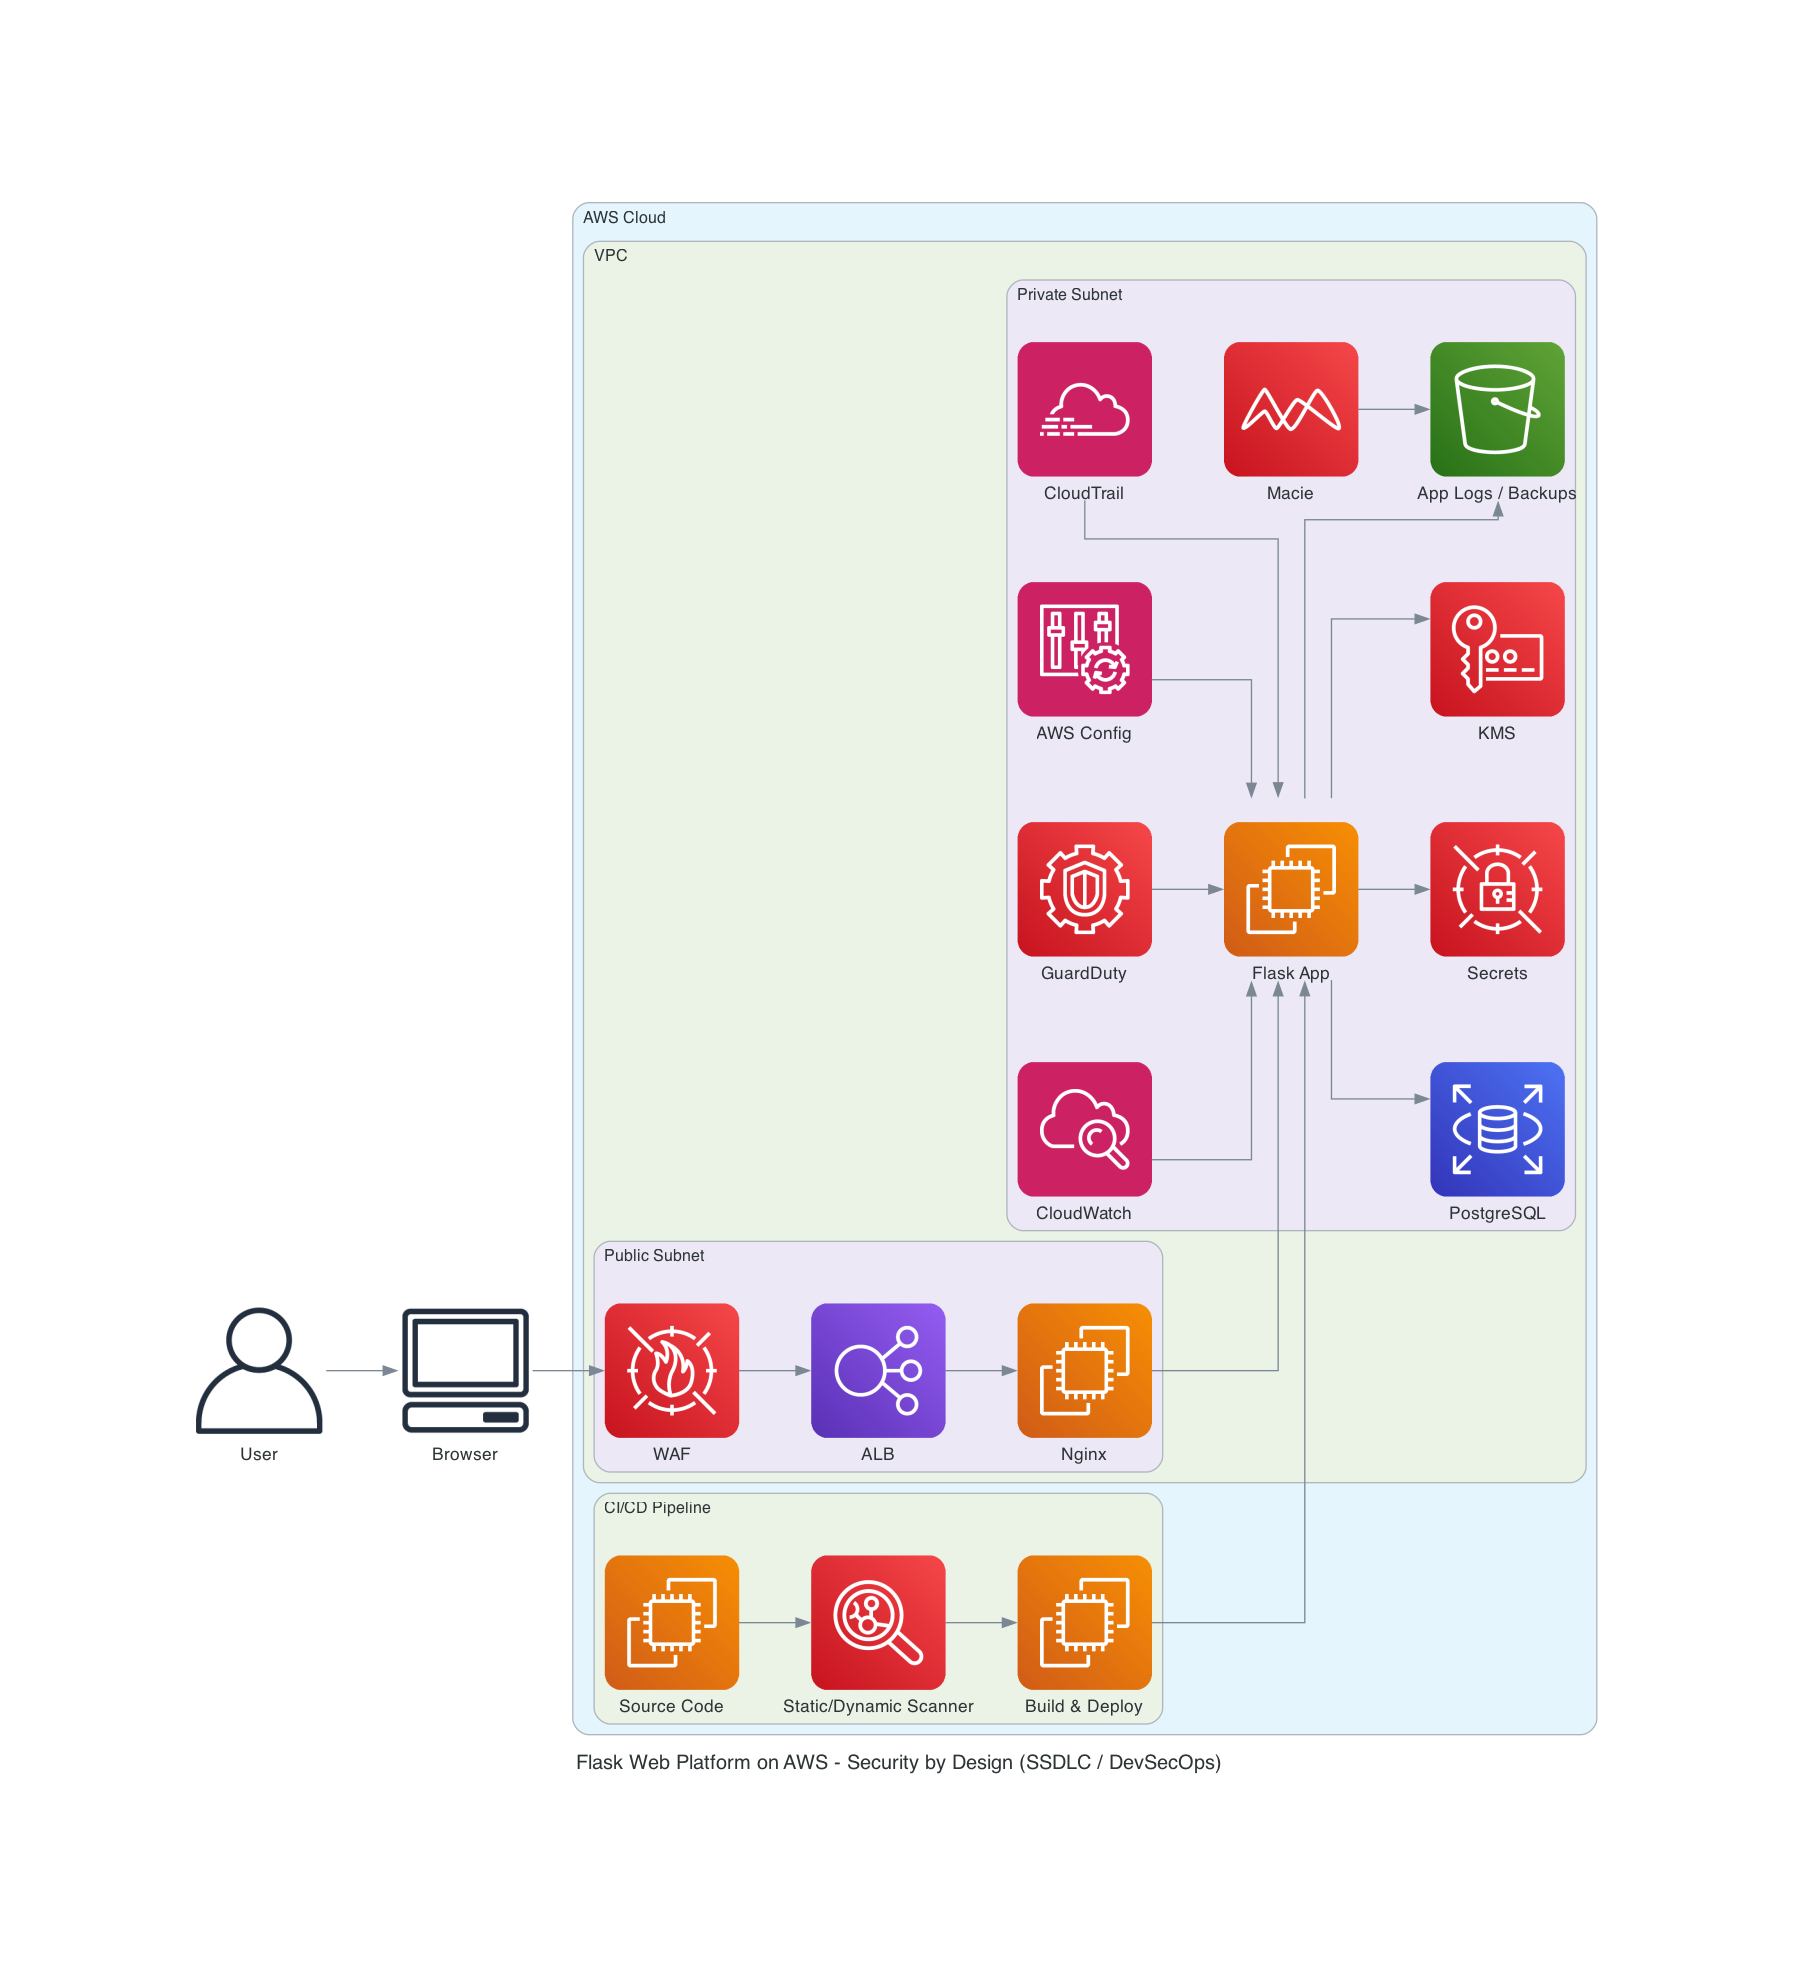

In [16]:
# Security by Design (SSDLC / DevSecOps) Diagram
with Diagram("Flask Web Platform on AWS - Security by Design (SSDLC / DevSecOps)", show=False, outformat="png", filename="flask_ssdlc_arch"):

    user = User("User")
    browser = Client("Browser")

    with Cluster("AWS Cloud"):
        with Cluster("CI/CD Pipeline"):
            code = EC2("Source Code")
            scanner = Inspector("Static/Dynamic Scanner")
            pipeline = EC2("Build & Deploy")

        with Cluster("VPC"):
            with Cluster("Public Subnet"):
                waf = WAF("WAF")
                lb = ELB("ALB")
                nginx = EC2("Nginx")

            with Cluster("Private Subnet"):
                app = EC2("Flask App")
                secrets = SecretsManager("Secrets")
                rds = RDS("PostgreSQL")
                s3 = S3("App Logs / Backups")
                cloudwatch = Cloudwatch("CloudWatch")
                guardduty = Guardduty("GuardDuty")
                macie = Macie("Macie")
                kms = KMS("KMS")
                config = Config("AWS Config")
                cloudtrail = Cloudtrail("CloudTrail")

    # Flow through DevSecOps lifecycle
    user >> browser >> waf >> lb >> nginx >> app >> rds
    code >> scanner >> pipeline >> app
    app >> secrets
    app >> s3
    app >> kms
    macie >> s3
    guardduty >> app
    cloudwatch >> app
    cloudtrail >> app
    config >> app

Image(filename="flask_ssdlc_arch.png")



## Zero Knowledge Architecture (ZKA)

**ZKA** ensures that service providers have no access to user data.

### Core Principles
- **End-to-End Encryption**: Only endpoints can decrypt.
- **Data Ownership**: Users hold the keys.
- **Privacy by Design**: Service sees nothing.

### When to Use
- Messaging, file sharing apps.
- Compliance-heavy environments (e.g. GDPR).

### When Not to Use
- Services needing server-side search/processing.
- Real-time analytics platforms.

### Appropriate Platforms
- Encrypted email, backup, messaging services.

### Usage
- **How Widely Used**: Niche but growing.
- **What It’s Used For**: Privacy-first apps.

### Issues
- **Access Recovery**: Forgotten keys = data loss.
- **Integration**: Complex key management.

### Well-Known Problems
- **Limited Functionality**: Search/filter is hard.
- **Compatibility**: Struggles with AI/ML.

### Known Cybersecurity Incidents
- **ProtonMail**: Metadata exposure despite E2EE.
- **Encrypted Phones**: Confiscated but inaccessible to authorities.

**Reference**: Proton, Signal, zk-SNARKs literature.



In [17]:
from tabulate import tabulate

zka_data = [
    ["Client-Side Encryption", "CSE with KMS, S3 (Private)", "Azure Blob with client-side encryption, BYOK", "Ensure cloud providers never access plaintext data"],
    ["Zero-Access Storage", "S3 with denied admin access policies", "Azure Blob + RBAC + no-ops access keys", "Prevent backend/control plane access to data"],
    ["Key Ownership", "AWS KMS (external), CloudHSM", "Azure Key Vault with customer-managed keys", "User controls cryptographic keys"],
    ["End-to-End Encryption", "E2EE in custom apps using AWS Lambda, Cognito", "Azure Functions with E2EE libraries", "Only clients encrypt/decrypt, not services"],
    ["Zero Knowledge Proofs", "zk-SNARK-enabled APIs (e.g., ZK-ID)", "Integration with zk-compatible apps", "Prove identity or access without revealing data"],
    ["Auditing", "CloudTrail + object-level logging", "Azure Activity Log + Storage Analytics", "Track data access attempts without exposing contents"]
]

headers = ["ZKA Control", "AWS Controls", "Azure Controls", "Purpose"]

print(tabulate(zka_data, headers=headers, tablefmt="fancy_grid"))


╒════════════════════════╤═══════════════════════════════════════════════╤══════════════════════════════════════════════╤══════════════════════════════════════════════════════╕
│ ZKA Control            │ AWS Controls                                  │ Azure Controls                               │ Purpose                                              │
╞════════════════════════╪═══════════════════════════════════════════════╪══════════════════════════════════════════════╪══════════════════════════════════════════════════════╡
│ Client-Side Encryption │ CSE with KMS, S3 (Private)                    │ Azure Blob with client-side encryption, BYOK │ Ensure cloud providers never access plaintext data   │
├────────────────────────┼───────────────────────────────────────────────┼──────────────────────────────────────────────┼──────────────────────────────────────────────────────┤
│ Zero-Access Storage    │ S3 with denied admin access policies          │ Azure Blob + RBAC + no-ops access keys  

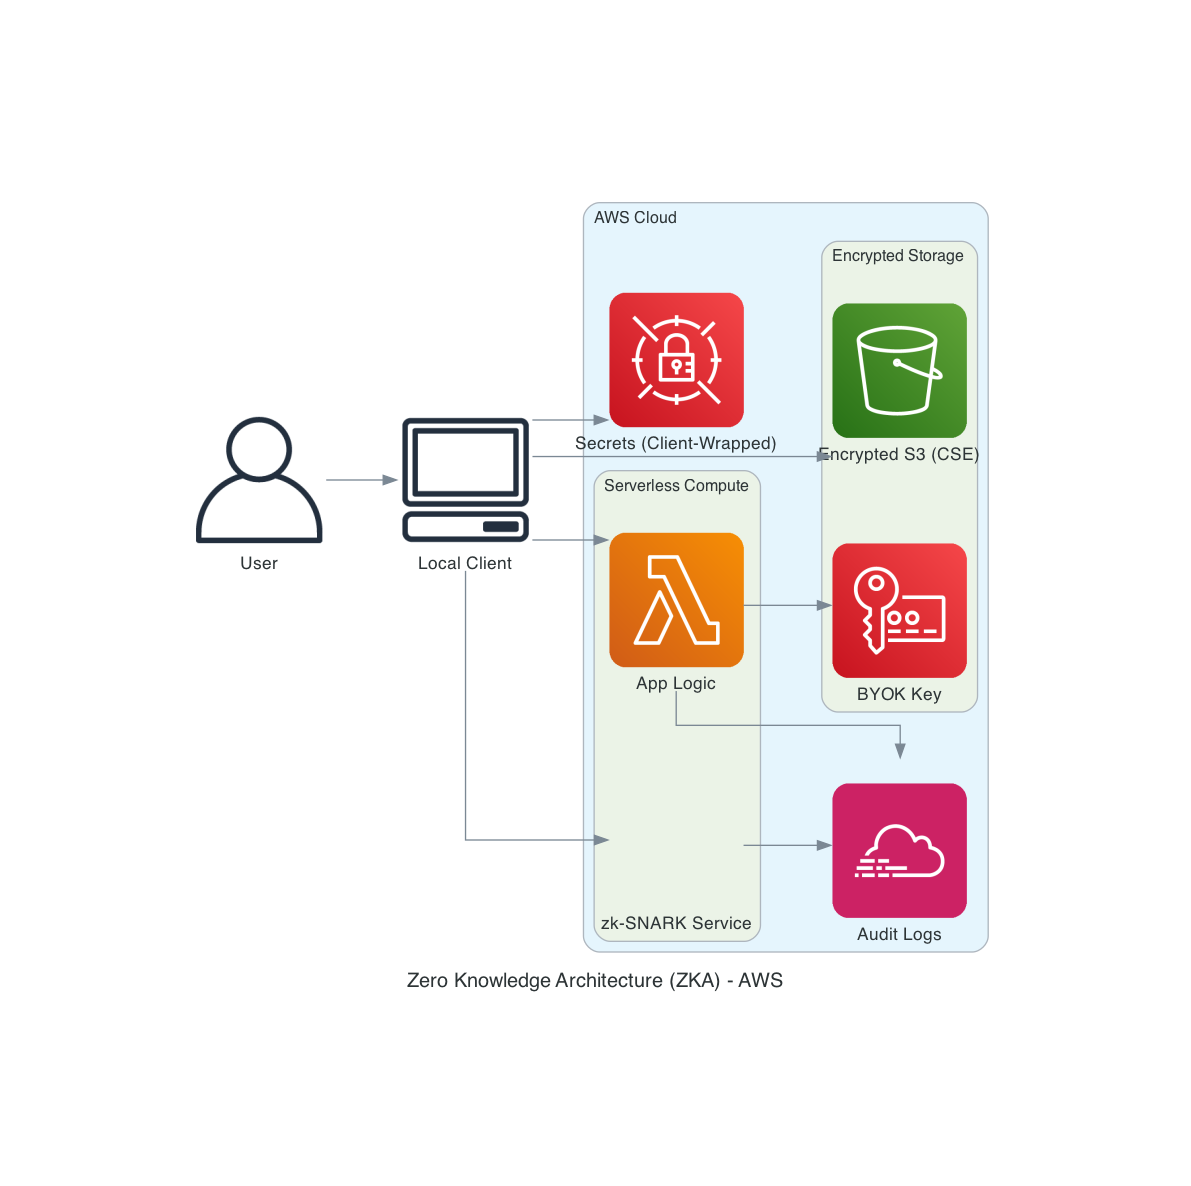

In [18]:
from diagrams import Diagram, Cluster
from diagrams.aws.general import User
from diagrams.aws.security import KMS, SecretsManager
from diagrams.aws.compute import Lambda
from diagrams.aws.storage import S3
from diagrams.aws.devtools import Codecommit
from diagrams.aws.ml import Personalize
from diagrams.aws.management import Cloudtrail
from diagrams.aws.integration import SQS
from diagrams.onprem.client import Client
from diagrams.custom import Custom

with Diagram("Zero Knowledge Architecture (ZKA) - AWS", show=False, outformat="png", filename="zka_arch"):
    user = User("User")
    client_app = Client("Local Client")

    with Cluster("AWS Cloud"):
        with Cluster("Encrypted Storage"):
            s3 = S3("Encrypted S3 (CSE)")
            kms = KMS("BYOK Key")

        with Cluster("Serverless Compute"):
            lambda_func = Lambda("App Logic")
            zkp = Custom("zk-SNARK Service", "./zkp_icon.png")

        secrets = SecretsManager("Secrets (Client-Wrapped)")
        audit = Cloudtrail("Audit Logs")

    user >> client_app >> lambda_func
    client_app >> s3
    client_app >> secrets
    client_app >> zkp
    lambda_func >> kms
    lambda_func >> audit
    zkp >> audit

# Generates: zka_arch.png
Image(filename="zka_arch.png")


## Adaptive Security Architecture (ASA)

**ASA** continuously adapts defense based on context and telemetry.

### Core Principles
- **Real-Time Monitoring**: Constant data flow.
- **Context-Aware Policies**: Dynamic security.
- **Automated Response**: Rapid reaction.

### When to Use
- Enterprises under active threat.
- Regulated industries needing visibility.

### When Not to Use
- Low-risk static apps.
- Environments without telemetry support.

### Appropriate Platforms
- SIEM/SOAR setups, ML-driven defense.

### Usage
- **How Widely Used**: Popular in large enterprises.
- **What It’s Used For**: Real-time detection and response.

### Issues
- **Noise**: Many false positives.
- **Complexity**: High integration effort.

### Well-Known Problems
- **Alert Fatigue**: Ignored critical events.
- **Latency**: Lag in policy updates.

### Known Cybersecurity Incidents
- **Capital One (2019)**: Alert missed in SIEM logs.
- **Equifax**: Delayed patching despite threat intel.

**Reference**: Gartner, MITRE D3FEND, NIST.



In [19]:
asa_data = [
    ["Telemetry Collection", "CloudWatch, GuardDuty, CloudTrail", "Azure Monitor, Log Analytics, Defender", "Collect data across stack for analysis"],
    ["Behavioral Analytics", "Detect anomalies with Macie/Lookout", "UEBA with Microsoft Defender for Cloud", "Identify abnormal behavior patterns"],
    ["Context-Aware Access", "IAM + device posture (AWS SSO, Conditional Access)", "Conditional Access, Intune device compliance", "Adjust access dynamically based on context"],
    ["Dynamic Policy Enforcement", "Lambda-based firewall policies", "Azure Policy + Logic Apps for enforcement", "React in real time to policy violations"],
    ["Automated Response", "SOAR via EventBridge + Lambda", "Sentinel Playbooks, Azure Automation", "Contain threats without manual effort"],
    ["Threat Intelligence", "AWS TI feeds, GuardDuty custom threat lists", "Microsoft Threat Intelligence Center", "Integrate external intel for smarter defense"]
]

headers = ["ASA Control", "AWS Controls", "Azure Controls", "Purpose"]

print(tabulate(asa_data, headers=headers, tablefmt="fancy_grid"))


╒════════════════════════════╤════════════════════════════════════════════════════╤══════════════════════════════════════════════╤══════════════════════════════════════════════╕
│ ASA Control                │ AWS Controls                                       │ Azure Controls                               │ Purpose                                      │
╞════════════════════════════╪════════════════════════════════════════════════════╪══════════════════════════════════════════════╪══════════════════════════════════════════════╡
│ Telemetry Collection       │ CloudWatch, GuardDuty, CloudTrail                  │ Azure Monitor, Log Analytics, Defender       │ Collect data across stack for analysis       │
├────────────────────────────┼────────────────────────────────────────────────────┼──────────────────────────────────────────────┼──────────────────────────────────────────────┤
│ Behavioral Analytics       │ Detect anomalies with Macie/Lookout                │ UEBA with Microsoft Defend

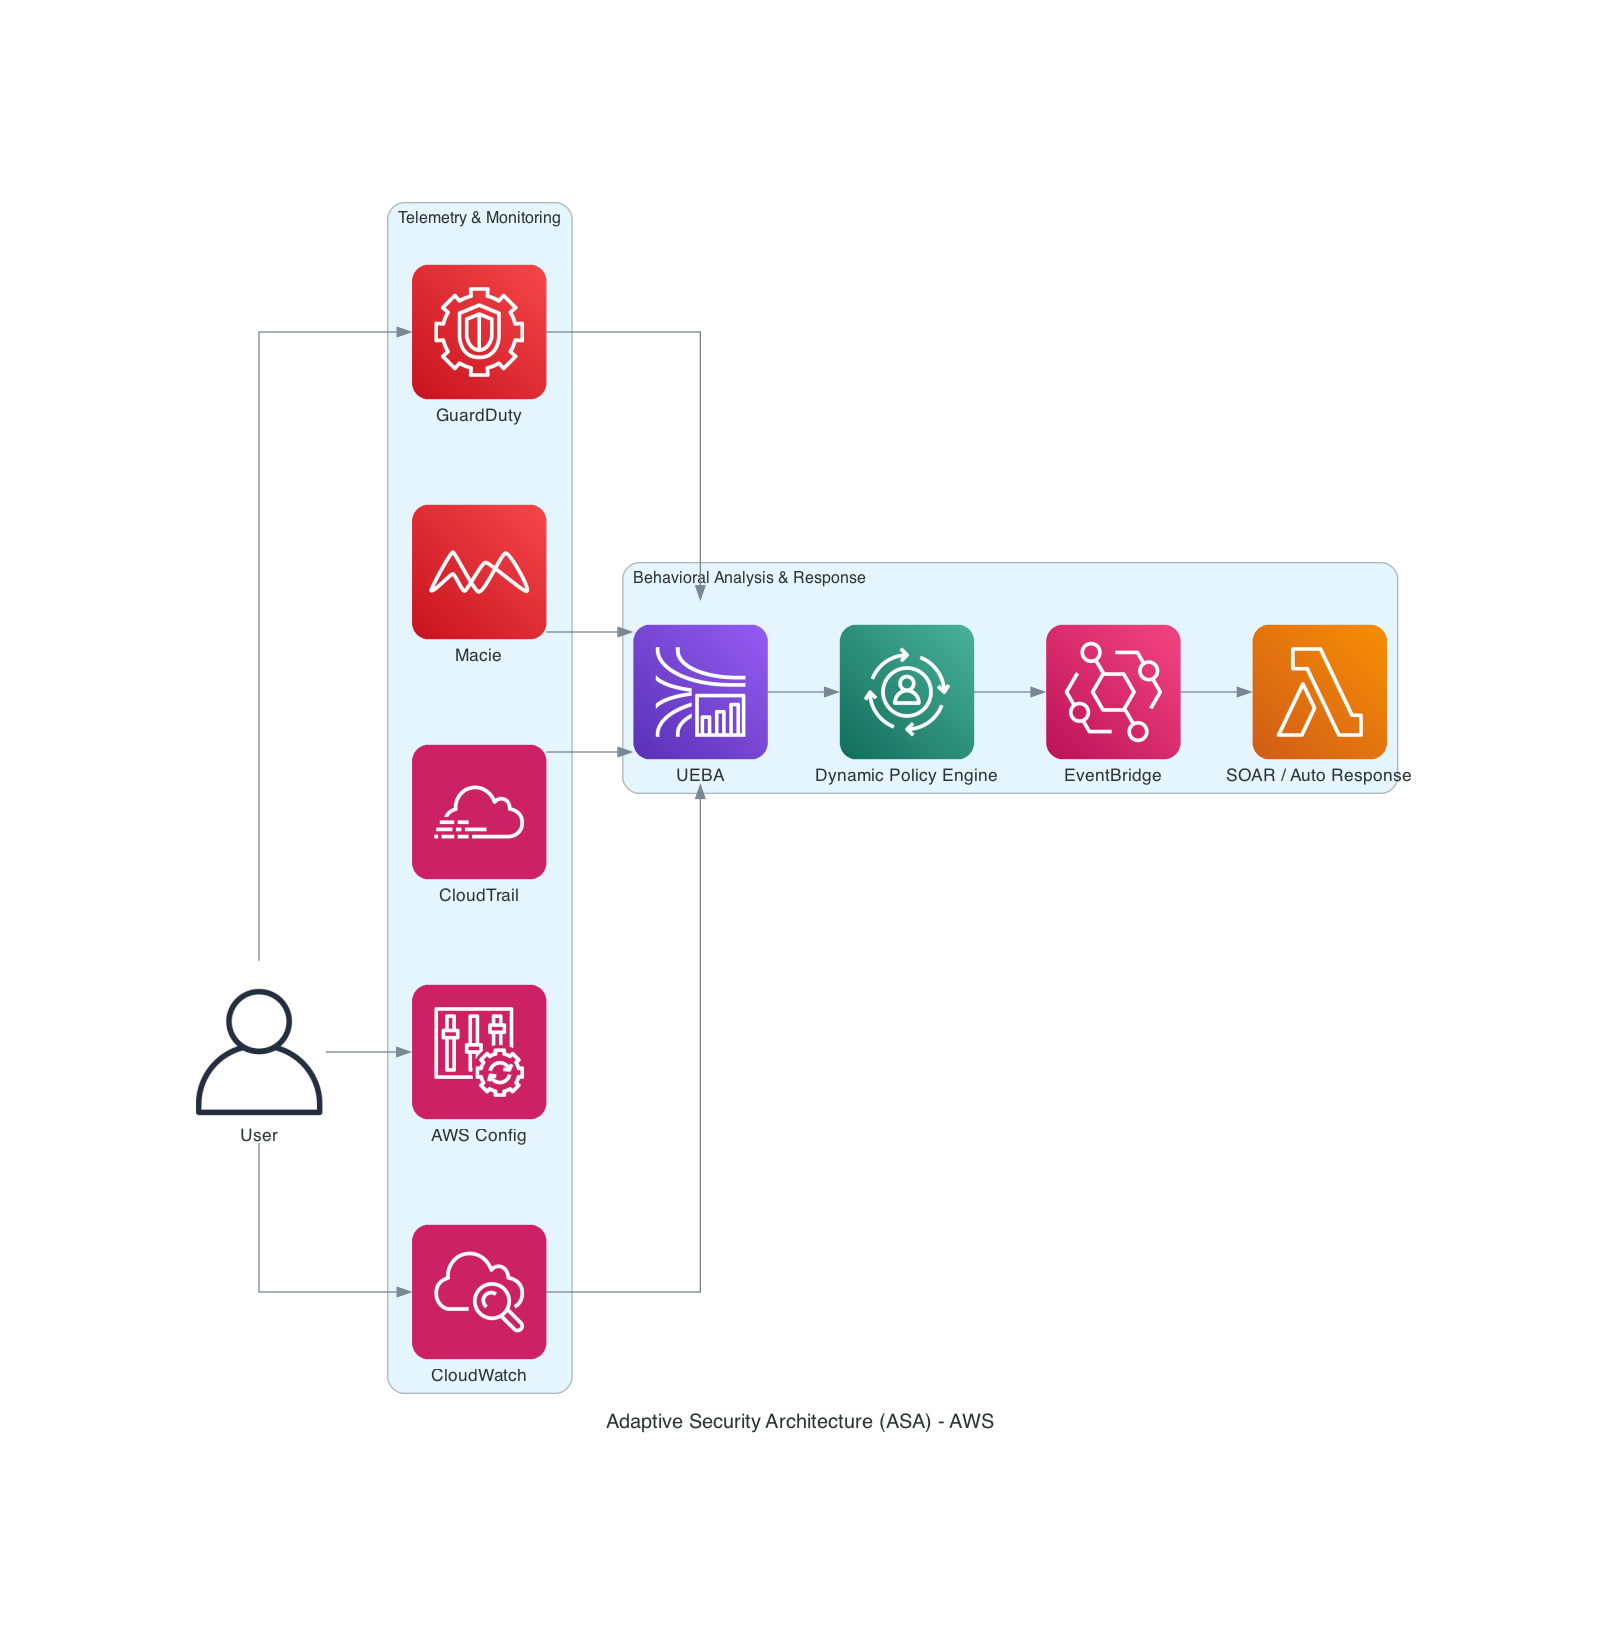

In [20]:
from diagrams import Diagram, Cluster
from diagrams.aws.general import User
from diagrams.aws.security import Guardduty, Macie
from diagrams.aws.management import Cloudwatch, Config, Cloudtrail
from diagrams.aws.integration import Eventbridge
from diagrams.aws.ml import Personalize
from diagrams.aws.compute import Lambda
from diagrams.aws.analytics import KinesisDataAnalytics

with Diagram("Adaptive Security Architecture (ASA) - AWS", show=False, outformat="png", filename="asa_arch"):

    user = User("User")

    with Cluster("Telemetry & Monitoring"):
        cloudwatch = Cloudwatch("CloudWatch")
        config = Config("AWS Config")
        trail = Cloudtrail("CloudTrail")
        macie = Macie("Macie")
        guardduty = Guardduty("GuardDuty")

    with Cluster("Behavioral Analysis & Response"):
        ueba = KinesisDataAnalytics("UEBA")
        policy_engine = Personalize("Dynamic Policy Engine")
        auto_response = Lambda("SOAR / Auto Response")
        event_trigger = Eventbridge("EventBridge")

    user >> cloudwatch
    user >> guardduty
    user >> config

    cloudwatch >> ueba
    guardduty >> ueba
    macie >> ueba
    trail >> ueba

    ueba >> policy_engine >> event_trigger >> auto_response

# Generates: asa_arch.png
Image(filename="asa_arch.png")

## Summary

In [21]:
from tabulate import tabulate

# Comparison table
comparison_data = [
    ["Architecture", "Core Principle", "Best Use Case", "Complexity", "Widely Used", "Major Issue", "Notable Incident"],
    ["MVC", "Separation of Concerns", "Web apps", "Moderate", "Extensive", "Tight Coupling", "SQL Injection"],
    ["Defense in Depth", "Layered Security", "High-value assets", "High", "Common", "Misconfiguration", "Target (2013)"],
    ["Zero Trust", "Never Trust", "Cloud/Remote", "High", "Growing", "User Experience", "SolarWinds (2020)"],
    ["TOGAF", "Structured ADM", "Enterprise IT", "Very High", "Broad", "Documentation", "Generic breaches"],
    ["SABSA", "Business-Driven", "Business alignment", "Very High", "Popular", "Translation", "Generic breaches"],
    ["SSDLC", "Security by Design", "Software dev", "Moderate", "Increasing", "Time Delay", "Heartbleed (2014)"],
    ["ZKA", "Service Never Sees Data", "E2EE Apps", "High", "Niche", "Key Recovery", "ProtonMail warrants"],
    ["ASA", "Adaptive Response", "Real-time risk", "Very High", "Enterprise", "False Positives", "Capital One (2019)"]
]

print(tabulate(comparison_data, headers="firstrow", tablefmt="fancy_grid"))


╒══════════════════╤═════════════════════════╤════════════════════╤══════════════╤═══════════════╤══════════════════╤═════════════════════╕
│ Architecture     │ Core Principle          │ Best Use Case      │ Complexity   │ Widely Used   │ Major Issue      │ Notable Incident    │
╞══════════════════╪═════════════════════════╪════════════════════╪══════════════╪═══════════════╪══════════════════╪═════════════════════╡
│ MVC              │ Separation of Concerns  │ Web apps           │ Moderate     │ Extensive     │ Tight Coupling   │ SQL Injection       │
├──────────────────┼─────────────────────────┼────────────────────┼──────────────┼───────────────┼──────────────────┼─────────────────────┤
│ Defense in Depth │ Layered Security        │ High-value assets  │ High         │ Common        │ Misconfiguration │ Target (2013)       │
├──────────────────┼─────────────────────────┼────────────────────┼──────────────┼───────────────┼──────────────────┼─────────────────────┤
│ Zero Trust       │

## Appendix: Abbreviations

This appendix expands abbreviations used throughout the notebook.

| Abbreviation | Full Form |
|--------------|-----------|
| EC2          | Elastic Compute Cloud |
| ELB          | Elastic Load Balancer |
| VPC          | Virtual Private Cloud |
| RDS          | Relational Database Service |
| IAM          | Identity and Access Management |
| WAF          | Web Application Firewall |
| KMS          | Key Management Service |
| S3           | Simple Storage Service |
| MFA          | Multi-Factor Authentication |
| VNet         | Virtual Network |
| NSG          | Network Security Group |
| SAST         | Static Application Security Testing |
| DAST         | Dynamic Application Security Testing |
| TOGAF        | The Open Group Architecture Framework |
| SABSA        | Sherwood Applied Business Security Architecture |
| SSDLC        | Secure Software Development Life Cycle |
| ADM          | Architecture Development Method |
| XSS          | Cross-Site Scripting |